In [1]:
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.sql.types import LongType
from pyspark.sql.types import FloatType
from pyspark.rdd import RDD
from pyspark.sql.types import StringType
from pyspark.sql.functions import col
import pyspark.sql.functions as F
import csv
from datetime import datetime
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
# local[*]: run Spark in local-mode(parallel computing) with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "Big data Analysis of Road Crash Data"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)
# creating a SparkContext object 
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')

In [2]:
Accident_Information_df = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/dft-road-casualty-statistics-accident-1979-2020.csv')
# changing the type of column("Year'") to interger type
#Accident_Information_df = Accident_Information_df.withColumn('Year',F.col('Year').cast(IntegerType()))
#Accident_Information_df=Accident_Information_df.filter(Accident_Information_df.Year<2017)
#Accident_Information_df.sort("Year").show(truncate=False)
A2018 = Accident_Information_df




In [3]:
#A2018 = Accident_Information_df


A2005=A2018.filter(A2018.accident_year>2004)
A20052020=A2005.filter(A2005.accident_year<2020)
A20052020.show()

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_ons_district|local_authority_highway|f

In [4]:
A2018=A20052020

In [5]:
from pyspark.sql.functions import col, when
valueWhenTrue1 ="M"
valueWhenTrue2 ="A"
valueWhenTrue3 = "A"
valueWhenTrue4 = "B"
valueWhenTrue5 = "C"
valueWhenTrue6 = "U"


A2018=A2018.withColumn(
    "first_road_class",
    when(
        col("first_road_class") == 1,
        "Motorway"
    ).otherwise(col("first_road_class")),
)
A2018=A2018.withColumn(
    "first_road_class",
    when(
        col("first_road_class") == 2,
        "A"
    ).otherwise(col("first_road_class")),
)
A2018=A2018.withColumn(
    "first_road_class",
    when(
        col("first_road_class") == 3,
        "A"
    ).otherwise(col("first_road_class")),
)
A2018=A2018.withColumn(
    "first_road_class",
    when(
        col("first_road_class") == 4,
        "B,C & U"
    ).otherwise(col("first_road_class")),
)
A2018=A2018.withColumn(
    "first_road_class",
    when(
        col("first_road_class") == 5,
        "B,C & U"
    ).otherwise(col("first_road_class")),
)
A2018=A2018.withColumn(
    "first_road_class",
    when(
        col("first_road_class") == 6,
        "B,C & U"
    ).otherwise(col("first_road_class")),
)





In [6]:
A2018.show()

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_ons_district|local_authority_highway|f

In [7]:
A2018t_df = A2018.groupby("first_road_class",'accident_year').agg(F.count(A2018.accident_index).alias('Total accidents'))
A2018t_df=A2018t_df.sort("accident_year")
A2018t_df.show()

+----------------+-------------+---------------+
|first_road_class|accident_year|Total accidents|
+----------------+-------------+---------------+
|        Motorway|         2005|           8198|
|         B,C & U|         2005|         101517|
|               A|         2005|          89020|
|               A|         2006|          84509|
|        Motorway|         2006|           7920|
|         B,C & U|         2006|          96732|
|        Motorway|         2007|           7488|
|         B,C & U|         2007|          92823|
|               A|         2007|          81804|
|         B,C & U|         2008|          86503|
|        Motorway|         2008|           6822|
|               A|         2008|          77266|
|        Motorway|         2009|           6172|
|               A|         2009|          74620|
|         B,C & U|         2009|          82762|
|               A|         2010|          70708|
|         B,C & U|         2010|          77640|
|        Motorway|  

In [8]:
A2018t_dftt = A2018t_df.withColumnRenamed("first_road_class", "road_name")\
       .withColumnRenamed("accident_year", "year")
A2018t_dftt.show()

+---------+----+---------------+
|road_name|year|Total accidents|
+---------+----+---------------+
|        A|2005|          89020|
| Motorway|2005|           8198|
|  B,C & U|2005|         101517|
|        A|2006|          84509|
|  B,C & U|2006|          96732|
| Motorway|2006|           7920|
|        A|2007|          81804|
| Motorway|2007|           7488|
|  B,C & U|2007|          92823|
| Motorway|2008|           6822|
|        A|2008|          77266|
|  B,C & U|2008|          86503|
|  B,C & U|2009|          82762|
|        A|2009|          74620|
| Motorway|2009|           6172|
|  B,C & U|2010|          77640|
|        A|2010|          70708|
| Motorway|2010|           6066|
|  B,C & U|2011|          75766|
|        A|2011|          70329|
+---------+----+---------------+
only showing top 20 rows



In [9]:

A2018t_dftt_df=A2018t_dftt.toPandas()
A2018t_dftt_df

road_name  year  Total accidents
0          A  2005            89020
1   Motorway  2005             8198
2    B,C & U  2005           101517
3          A  2006            84509
4    B,C & U  2006            96732
5   Motorway  2006             7920
6   Motorway  2007             7488
7    B,C & U  2007            92823
8          A  2007            81804
9          A  2008            77266
10  Motorway  2008             6822
11   B,C & U  2008            86503
12   B,C & U  2009            82762
13         A  2009            74620
14  Motorway  2009             6172
15         A  2010            70708
16  Motorway  2010             6066
17   B,C & U  2010            77640
18         A  2011            70329
19   B,C & U  2011            75766
20  Motorway  2011             5379
21  Motorway  2012             5212
22   B,C & U  2012            72790
23         A  2012            67569
24  Motorway  2013             4983
25         A  2013            64837
26   B,C & U  2013            68840
27   B,C & U  2014            72864
28         A  2014            68212
29  Motorway  2014             5246
30         A  2015            64682
31   B,C & U  2015            70226
32  Motorway  2015             5148
33   B,C & U  2016            69761
34  Motorway  2016             5007
35         A  2016            61853
36  Motorway  2017             4430
37         A  2017            56809
38   B,C & U  2017            68743
39  Motorway  2018             4225
40         A  2018            53840
41   B,C & U  2018            64570
42         A  2019            52662
43   B,C & U  2019            61064
44  Motorway  2019             3810

In [68]:
Trafficvolume.count()

362550

In [72]:
Trafficvolume.count()

3310056

In [43]:
Trafficvolume = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Desktop/disertation/annualtrafficcombined.csv')
# changing the type of column("Year'") to interger type
Trafficvolume = Trafficvolume.withColumn('year',F.col('year').cast(IntegerType()))
Trafficvolume=Trafficvolume.filter(Trafficvolume.year>2004)
Trafficvolume=Trafficvolume.filter(Trafficvolume.year<2020)
Trafficvolume.sort("year").show(truncate=False)

+---------+----+--------------+
|road_name|year|Trafficvolume |
+---------+----+--------------+
|B,C & U  |2005|106900000000.0|
|A        |2005|138600000000.0|
|Motorway |2005|60300000000.0 |
|Motorway |2006|61800000000.0 |
|B,C & U  |2006|108100000000.0|
|A        |2006|140500000000.0|
|A        |2007|139700000000.0|
|B,C & U  |2007|111100000000.0|
|Motorway |2007|62500000000.0 |
|B,C & U  |2008|109800000000.0|
|A        |2008|138500000000.0|
|Motorway |2008|62200000000.0 |
|A        |2009|138200000000.0|
|B,C & U  |2009|107300000000.0|
|Motorway |2009|61800000000.0 |
|A        |2010|136400000000.0|
|B,C & U  |2010|105800000000.0|
|Motorway |2010|61000000000.0 |
|Motorway |2011|61800000000.0 |
|A        |2011|137000000000.0|
+---------+----+--------------+
only showing top 20 rows



In [44]:
Trafficvolume.filter(col("road_name").contains("A")).show(2)

+---------+----+--------------+
|road_name|year| Trafficvolume|
+---------+----+--------------+
|        A|2005|138600000000.0|
|        A|2006|140500000000.0|
+---------+----+--------------+
only showing top 2 rows



In [45]:
TrafficvolumeGrouped=Trafficvolume.select(col("road_name"),col("year"),col("Trafficvolume")).sort("year")

TrafficvolumeGrouped.show()

+---------+----+--------------+
|road_name|year| Trafficvolume|
+---------+----+--------------+
|  B,C & U|2005|106900000000.0|
|        A|2005|138600000000.0|
| Motorway|2005| 60300000000.0|
| Motorway|2006| 61800000000.0|
|  B,C & U|2006|108100000000.0|
|        A|2006|140500000000.0|
|        A|2007|139700000000.0|
|  B,C & U|2007|111100000000.0|
| Motorway|2007| 62500000000.0|
|  B,C & U|2008|109800000000.0|
|        A|2008|138500000000.0|
| Motorway|2008| 62200000000.0|
|        A|2009|138200000000.0|
|  B,C & U|2009|107300000000.0|
| Motorway|2009| 61800000000.0|
|        A|2010|136400000000.0|
|  B,C & U|2010|105800000000.0|
| Motorway|2010| 61000000000.0|
| Motorway|2011| 61800000000.0|
|        A|2011|137000000000.0|
+---------+----+--------------+
only showing top 20 rows



In [46]:
import pyspark.sql.functions as f

TrafficvolumeGroupedupdated=TrafficvolumeGrouped.select(
    f.regexp_extract("road_name", pattern="^[A-Za-z]+(?=)", idx=0).alias('road_name'),
    f.regexp_replace("road_name", "^[A-Za-z]+_", "").alias("road_number"),
    "year",
    "all_motor_vehicles"

)
TrafficvolumeGroupedupdated.show()

AnalysisException: cannot resolve '`all_motor_vehicles`' given input columns: [Trafficvolume, road_name, year];
'Project [regexp_extract(road_name#873, ^[A-Za-z]+(?=), 0) AS road_name#934, regexp_replace(road_name#873, ^[A-Za-z]+_, , 1) AS road_number#935, year#879, 'all_motor_vehicles]
+- Sort [year#879 ASC NULLS FIRST], true
   +- Project [road_name#873, year#879, Trafficvolume#875]
      +- Filter (year#879 < 2020)
         +- Filter (year#879 > 2004)
            +- Project [road_name#873, cast(year#874 as int) AS year#879, Trafficvolume#875]
               +- Relation[road_name#873,year#874,Trafficvolume#875] csv


In [47]:
TrafficvolumeGroupedupdated=TrafficvolumeGroupedupdated.select(col("road_name"),col("year"),col("all_motor_vehicles")).sort("year")

TrafficvolumeGroupedupdated.show()

NameError: name 'TrafficvolumeGroupedupdated' is not defined

In [77]:
TrafficvolumeGroupedupdated_U = TrafficvolumeGroupedupdated.groupby('road_name','year').agg(F.sum(TrafficvolumeGroupedupdated['all_motor_vehicles']).alias('all_motor_vehicles'))
TrafficvolumeGroupedupdated_U.show()

+---------+----+------------------+
|road_name|year|all_motor_vehicles|
+---------+----+------------------+
|        A|2005|       7.8689351E7|
|        M|2005|       2.4352716E7|
|        U|2005|         7369477.0|
|        C|2005|         3816208.0|
|        B|2005|         4709562.0|
|        M|2006|       3.0686368E7|
|        A|2006|       7.7760371E7|
|        U|2006|         8209734.0|
|        C|2006|         4186058.0|
|        B|2006|         5203139.0|
|        A|2007|       8.0678016E7|
|        M|2007|       2.7693584E7|
|        U|2007|         7824099.0|
|        B|2007|         5008270.0|
|        C|2007|         3995513.0|
|        M|2008|       2.8008346E7|
|        A|2008|       7.6143383E7|
|        U|2008|       1.0834031E7|
|        B|2008|       1.2802995E7|
|        C|2008|         7579313.0|
+---------+----+------------------+
only showing top 20 rows



In [49]:
TrafficvolumeGroupedupdated_df=TrafficvolumeGrouped.toPandas()
TrafficvolumeGroupedupdated_df

road_name  year   Trafficvolume
0   Motorway  2005   60300000000.0
1          A  2005  138600000000.0
2    B,C & U  2005  106900000000.0
3   Motorway  2006   61800000000.0
4          A  2006  140500000000.0
5    B,C & U  2006  108100000000.0
6   Motorway  2007   62500000000.0
7          A  2007  139700000000.0
8    B,C & U  2007  111100000000.0
9   Motorway  2008   62200000000.0
10         A  2008  138500000000.0
11   B,C & U  2008  109800000000.0
12  Motorway  2009   61800000000.0
13         A  2009  138200000000.0
14   B,C & U  2009  107300000000.0
15  Motorway  2010   61000000000.0
16         A  2010  136400000000.0
17   B,C & U  2010  105800000000.0
18  Motorway  2011   61800000000.0
19         A  2011  137000000000.0
20   B,C & U  2011  105500000000.0
21  Motorway  2012   62400000000.0
22         A  2012  135800000000.0
23   B,C & U  2012  106400000000.0
24  Motorway  2013   63300000000.0
25         A  2013  135800000000.0
26   B,C & U  2013  106600000000.0
27  Motorway  2014   64800000000.0
28         A  2014  138500000000.0
29   B,C & U  2014  111200000000.0
30  Motorway  2015   66500000000.0
31         A  2015  141000000000.0
32   B,C & U  2015  112900000000.0
33  Motorway  2016   67700000000.0
34         A  2016  144900000000.0
35   B,C & U  2016  115400000000.0
36  Motorway  2017   68700000000.0
37         A  2017  146500000000.0
38   B,C & U  2017  117400000000.0
39  Motorway  2018   69000000000.0
40         A  2018  148600000000.0
41   B,C & U  2018  116600000000.0
42  Motorway  2019   70500000000.0
43         A  2019  150200000000.0
44   B,C & U  2019  117900000000.0

In [79]:
import pandas as pd
df = pd.read_csv ('/Users/Asfandyar/Desktop/disertation/diseration_final/Road lengths (miles).csv')
df

year      M       A       B       C        U
0   2005  2,186  29,035  18,758  52,480  138,679
1   2006  2,209  29,040  18,652  52,487  142,670
2   2007  2,212  29,045  18,806  52,458  142,847
3   2008  2,211  29,012  18,741  52,552  142,594
4   2009  2,212  29,061  18,729  52,700  142,384
5   2010  2,211  29,022  18,760  52,709  142,275
6   2011  2,218  29,039  18,770  52,712  142,265
7   2012  2,248  29,044  18,774  52,756  142,551
8   2013  2,262  29,049  18,776  52,819  143,273
9   2014  2,265  29,071  18,770  52,866  143,549
10  2015  2,270  29,065  18,819  52,420  143,305
11  2016  2,268  29,090  18,825  52,475  143,911
12  2017  2,292  29,140  18,842  52,379  143,305
13  2018  2,313  29,440  18,836  53,392  142,715
14  2019  2,320  29,489  18,842  53,371  143,965

In [80]:
roadlenghth=df.melt(id_vars=["year"], 
        var_name="road_name", 
        value_name="link_length_km")
roadlenghth

year road_name link_length_km
0   2005         M          2,186
1   2006         M          2,209
2   2007         M          2,212
3   2008         M          2,211
4   2009         M          2,212
..   ...       ...            ...
70  2015         U        143,305
71  2016         U        143,911
72  2017         U        143,305
73  2018         U        142,715
74  2019         U        143,965

[75 rows x 3 columns]

In [81]:
result22=pd.merge(TrafficvolumeGroupedupdated_df, roadlenghth, on=['year','road_name'])
result22

road_name  year  all_motor_vehicles link_length_km
0          A  2005          78689351.0         29,035
1          M  2005          24352716.0          2,186
2          U  2005           7369477.0        138,679
3          C  2005           3816208.0         52,480
4          B  2005           4709562.0         18,758
..       ...   ...                 ...            ...
70         A  2019          64275975.0         29,489
71         M  2019          25629481.0          2,320
72         C  2019           6641590.0         53,371
73         U  2019           7504917.0        143,965
74         B  2019          10353469.0         18,842

[75 rows x 4 columns]

In [82]:
result22["link_length_km"]=result22["link_length_km"].str.replace(',','')
result22["link_length_km"] = result22["link_length_km"].astype(float)
type(result22["all_motor_vehicles"][0])

numpy.float64

In [83]:

result22["Trafficvolume"] = result22["all_motor_vehicles"] * result22["link_length_km"]
result22

road_name  year  all_motor_vehicles  link_length_km  Trafficvolume
0          A  2005          78689351.0         29035.0   2.284745e+12
1          M  2005          24352716.0          2186.0   5.323504e+10
2          U  2005           7369477.0        138679.0   1.021992e+12
3          C  2005           3816208.0         52480.0   2.002746e+11
4          B  2005           4709562.0         18758.0   8.834196e+10
..       ...   ...                 ...             ...            ...
70         A  2019          64275975.0         29489.0   1.895434e+12
71         M  2019          25629481.0          2320.0   5.946040e+10
72         C  2019           6641590.0         53371.0   3.544683e+11
73         U  2019           7504917.0        143965.0   1.080445e+12
74         B  2019          10353469.0         18842.0   1.950801e+11

[75 rows x 5 columns]

In [50]:
result22=TrafficvolumeGroupedupdated_df
result22

road_name  year   Trafficvolume
0   Motorway  2005   60300000000.0
1          A  2005  138600000000.0
2    B,C & U  2005  106900000000.0
3   Motorway  2006   61800000000.0
4          A  2006  140500000000.0
5    B,C & U  2006  108100000000.0
6   Motorway  2007   62500000000.0
7          A  2007  139700000000.0
8    B,C & U  2007  111100000000.0
9   Motorway  2008   62200000000.0
10         A  2008  138500000000.0
11   B,C & U  2008  109800000000.0
12  Motorway  2009   61800000000.0
13         A  2009  138200000000.0
14   B,C & U  2009  107300000000.0
15  Motorway  2010   61000000000.0
16         A  2010  136400000000.0
17   B,C & U  2010  105800000000.0
18  Motorway  2011   61800000000.0
19         A  2011  137000000000.0
20   B,C & U  2011  105500000000.0
21  Motorway  2012   62400000000.0
22         A  2012  135800000000.0
23   B,C & U  2012  106400000000.0
24  Motorway  2013   63300000000.0
25         A  2013  135800000000.0
26   B,C & U  2013  106600000000.0
27  Motorway  2014   64800000000.0
28         A  2014  138500000000.0
29   B,C & U  2014  111200000000.0
30  Motorway  2015   66500000000.0
31         A  2015  141000000000.0
32   B,C & U  2015  112900000000.0
33  Motorway  2016   67700000000.0
34         A  2016  144900000000.0
35   B,C & U  2016  115400000000.0
36  Motorway  2017   68700000000.0
37         A  2017  146500000000.0
38   B,C & U  2017  117400000000.0
39  Motorway  2018   69000000000.0
40         A  2018  148600000000.0
41   B,C & U  2018  116600000000.0
42  Motorway  2019   70500000000.0
43         A  2019  150200000000.0
44   B,C & U  2019  117900000000.0

In [51]:
result22=result22.drop(['all_motor_vehicles', 'link_length_km'], axis=1)
result22

KeyError: "['all_motor_vehicles' 'link_length_km'] not found in axis"

In [85]:
A2018t_dftt_df

road_name  year  Total accidents
0          U  2005            60026
1          A  2005            89020
2          B  2005            24991
3          C  2005            16500
4          M  2005             8198
..       ...   ...              ...
70         A  2019            52662
71         M  2019             3810
72         C  2019             6067
73         U  2019            40459
74         B  2019            14538

[75 rows x 3 columns]

In [54]:
result23['Trafficvolume'] = result23['Trafficvolume'].astype(float)
type(result23['Trafficvolume'][0])

numpy.float64

In [28]:
type(result23['Trafficvolume'][0])

numpy.float64

In [53]:
result23=pd.merge(A2018t_dftt_df, result22, on=['year','road_name'])
result23

road_name  year  Total accidents   Trafficvolume
0          A  2005            89020  138600000000.0
1   Motorway  2005             8198   60300000000.0
2    B,C & U  2005           101517  106900000000.0
3          A  2006            84509  140500000000.0
4    B,C & U  2006            96732  108100000000.0
5   Motorway  2006             7920   61800000000.0
6   Motorway  2007             7488   62500000000.0
7    B,C & U  2007            92823  111100000000.0
8          A  2007            81804  139700000000.0
9          A  2008            77266  138500000000.0
10  Motorway  2008             6822   62200000000.0
11   B,C & U  2008            86503  109800000000.0
12   B,C & U  2009            82762  107300000000.0
13         A  2009            74620  138200000000.0
14  Motorway  2009             6172   61800000000.0
15         A  2010            70708  136400000000.0
16  Motorway  2010             6066   61000000000.0
17   B,C & U  2010            77640  105800000000.0
18         A  2011            70329  137000000000.0
19   B,C & U  2011            75766  105500000000.0
20  Motorway  2011             5379   61800000000.0
21  Motorway  2012             5212   62400000000.0
22   B,C & U  2012            72790  106400000000.0
23         A  2012            67569  135800000000.0
24  Motorway  2013             4983   63300000000.0
25         A  2013            64837  135800000000.0
26   B,C & U  2013            68840  106600000000.0
27   B,C & U  2014            72864  111200000000.0
28         A  2014            68212  138500000000.0
29  Motorway  2014             5246   64800000000.0
30         A  2015            64682  141000000000.0
31   B,C & U  2015            70226  112900000000.0
32  Motorway  2015             5148   66500000000.0
33   B,C & U  2016            69761  115400000000.0
34  Motorway  2016             5007   67700000000.0
35         A  2016            61853  144900000000.0
36  Motorway  2017             4430   68700000000.0
37         A  2017            56809  146500000000.0
38   B,C & U  2017            68743  117400000000.0
39  Motorway  2018             4225   69000000000.0
40         A  2018            53840  148600000000.0
41   B,C & U  2018            64570  116600000000.0
42         A  2019            52662  150200000000.0
43   B,C & U  2019            61064  117900000000.0
44  Motorway  2019             3810   70500000000.0

In [55]:
result23_sc=spark.createDataFrame(result22) 
result23_sc.show()

+---------+----+--------------+
|road_name|year| Trafficvolume|
+---------+----+--------------+
| Motorway|2005| 60300000000.0|
|        A|2005|138600000000.0|
|  B,C & U|2005|106900000000.0|
| Motorway|2006| 61800000000.0|
|        A|2006|140500000000.0|
|  B,C & U|2006|108100000000.0|
| Motorway|2007| 62500000000.0|
|        A|2007|139700000000.0|
|  B,C & U|2007|111100000000.0|
| Motorway|2008| 62200000000.0|
|        A|2008|138500000000.0|
|  B,C & U|2008|109800000000.0|
| Motorway|2009| 61800000000.0|
|        A|2009|138200000000.0|
|  B,C & U|2009|107300000000.0|
| Motorway|2010| 61000000000.0|
|        A|2010|136400000000.0|
|  B,C & U|2010|105800000000.0|
| Motorway|2011| 61800000000.0|
|        A|2011|137000000000.0|
+---------+----+--------------+
only showing top 20 rows



In [56]:

result23["Accident Probability"] = result23["Total accidents"] / result23["Trafficvolume"]
result23=result23.drop(['Total accidents', 'Trafficvolume'], axis=1)
result23

road_name  year  Accident Probability
0          A  2005          6.422799e-07
1   Motorway  2005          1.359536e-07
2    B,C & U  2005          9.496445e-07
3          A  2006          6.014875e-07
4    B,C & U  2006          8.948381e-07
5   Motorway  2006          1.281553e-07
6   Motorway  2007          1.198080e-07
7    B,C & U  2007          8.354905e-07
8          A  2007          5.855691e-07
9          A  2008          5.578773e-07
10  Motorway  2008          1.096785e-07
11   B,C & U  2008          7.878233e-07
12   B,C & U  2009          7.713141e-07
13         A  2009          5.399421e-07
14  Motorway  2009          9.987055e-08
15         A  2010          5.183871e-07
16  Motorway  2010          9.944262e-08
17   B,C & U  2010          7.338374e-07
18         A  2011          5.133504e-07
19   B,C & U  2011          7.181611e-07
20  Motorway  2011          8.703883e-08
21  Motorway  2012          8.352564e-08
22   B,C & U  2012          6.841165e-07
23         A  2012          4.975626e-07
24  Motorway  2013          7.872038e-08
25         A  2013          4.774448e-07
26   B,C & U  2013          6.457786e-07
27   B,C & U  2014          6.552518e-07
28         A  2014          4.925054e-07
29  Motorway  2014          8.095679e-08
30         A  2015          4.587376e-07
31   B,C & U  2015          6.220195e-07
32  Motorway  2015          7.741353e-08
33   B,C & U  2016          6.045147e-07
34  Motorway  2016          7.395864e-08
35         A  2016          4.268668e-07
36  Motorway  2017          6.448326e-08
37         A  2017          3.877747e-07
38   B,C & U  2017          5.855451e-07
39  Motorway  2018          6.123188e-08
40         A  2018          3.623149e-07
41   B,C & U  2018          5.537736e-07
42         A  2019          3.506125e-07
43   B,C & U  2019          5.179304e-07
44  Motorway  2019          5.404255e-08

In [31]:
#park.conf.set("spark.sql.execution.arrow.enabled","true")
Accidenteeachyearwrtroad=spark.createDataFrame(result23) 
Accidenteeachyearwrtroad.show()

+---------+----+--------------------+
|road_name|year|Accident Probability|
+---------+----+--------------------+
|        A|2005|   642.2799422799424|
| Motorway|2005|   135.9535655058043|
|  B,C & U|2005|   949.6445275958839|
|        A|2006|   601.4875444839857|
|  B,C & U|2006|   894.8381128584645|
| Motorway|2006|  128.15533980582524|
| Motorway|2007|             119.808|
|  B,C & U|2007|   835.4905490549055|
|        A|2007|   585.5690765926987|
|        A|2008|   557.8772563176896|
| Motorway|2008|  109.67845659163987|
|  B,C & U|2008|   787.8233151183971|
|  B,C & U|2009|   771.3140726933831|
|        A|2009|   539.9421128798842|
| Motorway|2009|    99.8705501618123|
|        A|2010|   518.3870967741935|
| Motorway|2010|   99.44262295081967|
|  B,C & U|2010|   733.8374291115313|
|        A|2011|   513.3503649635037|
|  B,C & U|2011|   718.1611374407582|
+---------+----+--------------------+
only showing top 20 rows



In [57]:
A=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name.contains("A")).toPandas()
B=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name.contains("B")).toPandas()
C=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name.contains("C")).toPandas()
M=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name.contains("M")).toPandas()
U=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name.contains("U")).toPandas()
A

road_name  year  Accident Probability
0          A  2005            642.279942
1          A  2006            601.487544
2          A  2007            585.569077
3          A  2008            557.877256
4          A  2009            539.942113
5          A  2010            518.387097
6          A  2011            513.350365
7          A  2012            497.562592
8          A  2013            477.444772
9          A  2014            492.505415
10         A  2015            458.737589
11         A  2016            426.866805
12         A  2017            387.774744
13         A  2018            362.314939
14         A  2019            350.612517

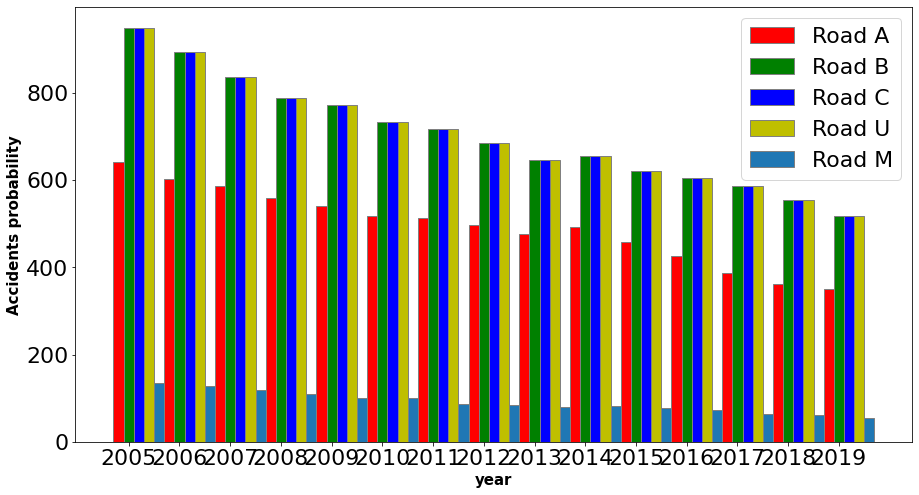

In [58]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(15, 8))
 
# set height of bar
#resultGoodsperbillp.plot.bar(x="Year", y="Accidents per billion mile")
IT = A["Accident Probability"]
ECE = B["Accident Probability"]
CAC = C["Accident Probability"]
CSE = M["Accident Probability"]
CAR = U["Accident Probability"]

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Road A')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='Road B')
plt.bar(br3, CAC, color ='b', width = barWidth,
        edgecolor ='grey', label ='Road C')
plt.bar(br4, CAR, color ='y', width = barWidth,
        edgecolor ='grey', label ='Road U')
plt.bar(br5, CSE, width = barWidth,
        edgecolor ='grey', label ='Road M')
 
 
# Adding Xticks
plt.xlabel('year', fontweight ='bold', fontsize = 15)
plt.ylabel('Accidents probability', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        A["year"])
 
plt.legend()
plt.show()

In [59]:
result23

road_name  year  Accident Probability
0          A  2005          6.422799e-07
1   Motorway  2005          1.359536e-07
2    B,C & U  2005          9.496445e-07
3          A  2006          6.014875e-07
4    B,C & U  2006          8.948381e-07
5   Motorway  2006          1.281553e-07
6   Motorway  2007          1.198080e-07
7    B,C & U  2007          8.354905e-07
8          A  2007          5.855691e-07
9          A  2008          5.578773e-07
10  Motorway  2008          1.096785e-07
11   B,C & U  2008          7.878233e-07
12   B,C & U  2009          7.713141e-07
13         A  2009          5.399421e-07
14  Motorway  2009          9.987055e-08
15         A  2010          5.183871e-07
16  Motorway  2010          9.944262e-08
17   B,C & U  2010          7.338374e-07
18         A  2011          5.133504e-07
19   B,C & U  2011          7.181611e-07
20  Motorway  2011          8.703883e-08
21  Motorway  2012          8.352564e-08
22   B,C & U  2012          6.841165e-07
23         A  2012          4.975626e-07
24  Motorway  2013          7.872038e-08
25         A  2013          4.774448e-07
26   B,C & U  2013          6.457786e-07
27   B,C & U  2014          6.552518e-07
28         A  2014          4.925054e-07
29  Motorway  2014          8.095679e-08
30         A  2015          4.587376e-07
31   B,C & U  2015          6.220195e-07
32  Motorway  2015          7.741353e-08
33   B,C & U  2016          6.045147e-07
34  Motorway  2016          7.395864e-08
35         A  2016          4.268668e-07
36  Motorway  2017          6.448326e-08
37         A  2017          3.877747e-07
38   B,C & U  2017          5.855451e-07
39  Motorway  2018          6.123188e-08
40         A  2018          3.623149e-07
41   B,C & U  2018          5.537736e-07
42         A  2019          3.506125e-07
43   B,C & U  2019          5.179304e-07
44  Motorway  2019          5.404255e-08

In [411]:
type(result23['Accident Probability'][0])

numpy.float64

In [60]:
result23_opiv=result23.pivot_table('Accident Probability', ['year'], 'road_name')
result23_opiv

road_name             A       B,C & U      Motorway
year                                               
2005       6.422799e-07  9.496445e-07  1.359536e-07
2006       6.014875e-07  8.948381e-07  1.281553e-07
2007       5.855691e-07  8.354905e-07  1.198080e-07
2008       5.578773e-07  7.878233e-07  1.096785e-07
2009       5.399421e-07  7.713141e-07  9.987055e-08
2010       5.183871e-07  7.338374e-07  9.944262e-08
2011       5.133504e-07  7.181611e-07  8.703883e-08
2012       4.975626e-07  6.841165e-07  8.352564e-08
2013       4.774448e-07  6.457786e-07  7.872038e-08
2014       4.925054e-07  6.552518e-07  8.095679e-08
2015       4.587376e-07  6.220195e-07  7.741353e-08
2016       4.268668e-07  6.045147e-07  7.395864e-08
2017       3.877747e-07  5.855451e-07  6.448326e-08
2018       3.623149e-07  5.537736e-07  6.123188e-08
2019       3.506125e-07  5.179304e-07  5.404255e-08

In [61]:
dataset_table=result23_opiv 
dataset_table.values 

array([[6.42279942e-07, 9.49644528e-07, 1.35953566e-07],
       [6.01487544e-07, 8.94838113e-07, 1.28155340e-07],
       [5.85569077e-07, 8.35490549e-07, 1.19808000e-07],
       [5.57877256e-07, 7.87823315e-07, 1.09678457e-07],
       [5.39942113e-07, 7.71314073e-07, 9.98705502e-08],
       [5.18387097e-07, 7.33837429e-07, 9.94426230e-08],
       [5.13350365e-07, 7.18161137e-07, 8.70388350e-08],
       [4.97562592e-07, 6.84116541e-07, 8.35256410e-08],
       [4.77444772e-07, 6.45778612e-07, 7.87203791e-08],
       [4.92505415e-07, 6.55251799e-07, 8.09567901e-08],
       [4.58737589e-07, 6.22019486e-07, 7.74135338e-08],
       [4.26866805e-07, 6.04514731e-07, 7.39586411e-08],
       [3.87774744e-07, 5.85545145e-07, 6.44832606e-08],
       [3.62314939e-07, 5.53773585e-07, 6.12318841e-08],
       [3.50612517e-07, 5.17930450e-07, 5.40425532e-08]])

In [441]:
dataset_table.values 

array([[3.89627674e-08, 2.82889341e-07, 8.23868845e-08, 1.53996323e-07,
        5.87343321e-08],
       [3.74238123e-08, 2.45504978e-07, 7.56211633e-08, 1.16837963e-07,
        4.80592752e-08],
       [3.49098473e-08, 2.47299145e-07, 7.75155626e-08, 1.22236681e-07,
        4.76750721e-08],
       [3.49766807e-08, 9.07014908e-08, 3.91656652e-08, 1.10162938e-07,
        3.18085466e-08],
       [2.76508300e-08, 1.03867034e-07, 4.20038816e-08, 1.01638522e-07,
        3.08825045e-08],
       [2.70274897e-08, 1.57855282e-07, 8.55270531e-08, 9.78777857e-08,
        1.17858661e-07],
       [3.46589093e-08, 1.56377611e-07, 8.60335990e-08, 9.18201519e-08,
        1.14374627e-07],
       [3.16907830e-08, 1.51974973e-07, 8.25173364e-08, 7.95863994e-08,
        1.09948130e-07],
       [3.09490620e-08, 1.43997560e-07, 7.47498206e-08, 8.18530442e-08,
        1.03895088e-07],
       [4.18316136e-08, 1.51236539e-07, 7.95447618e-08, 7.99038052e-08,
        1.11770804e-07],
       [3.86734202e-08, 1.4369

In [62]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

dataset=sns.load_dataset('tips')
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
#Observed Values
Observed_Values = dataset_table.values 
val=stats.chi2_contingency(dataset_table)

Expected_Values=val[3]
Expected_Values

no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2


Degree of Freedom:- 1


In [63]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [64]:
print(Observed_Values,Expected_Values)

[[60 97]
 [33 54]] [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


In [65]:
r=[]
result = [[0,0],
         [0,0]]
for o,e in zip(Observed_Values,Expected_Values):
    a=(o-e)**2./e
    print("hi",a)
    r.append(a[0]+a[1])
print("r",r)
chi_square_statistic=r[0]+r[1]
chi_square_statistic


hi [0.00042693 0.00026294]
hi [0.00077044 0.00047451]
r [0.0006898738224860787, 0.0012449447141415443]


0.001934818536627623

In [373]:
result[0]

[0.0008538602229130974, 0.00052588742205906]

In [470]:
r[0]

array([1.85745130e-09, 1.99654903e-08, 4.97591969e-10, 2.08401152e-10,
       2.67803669e-08])

In [66]:
chi_square_statistic=r[0]+r[1]
chi_square_statistic

0.001934818536627623

In [67]:
result23_opiv

road_name             A       B,C & U      Motorway
year                                               
2005       6.422799e-07  9.496445e-07  1.359536e-07
2006       6.014875e-07  8.948381e-07  1.281553e-07
2007       5.855691e-07  8.354905e-07  1.198080e-07
2008       5.578773e-07  7.878233e-07  1.096785e-07
2009       5.399421e-07  7.713141e-07  9.987055e-08
2010       5.183871e-07  7.338374e-07  9.944262e-08
2011       5.133504e-07  7.181611e-07  8.703883e-08
2012       4.975626e-07  6.841165e-07  8.352564e-08
2013       4.774448e-07  6.457786e-07  7.872038e-08
2014       4.925054e-07  6.552518e-07  8.095679e-08
2015       4.587376e-07  6.220195e-07  7.741353e-08
2016       4.268668e-07  6.045147e-07  7.395864e-08
2017       3.877747e-07  5.855451e-07  6.448326e-08
2018       3.623149e-07  5.537736e-07  6.123188e-08
2019       3.506125e-07  5.179304e-07  5.404255e-08

In [38]:
years=result23['year'].unique()
years

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

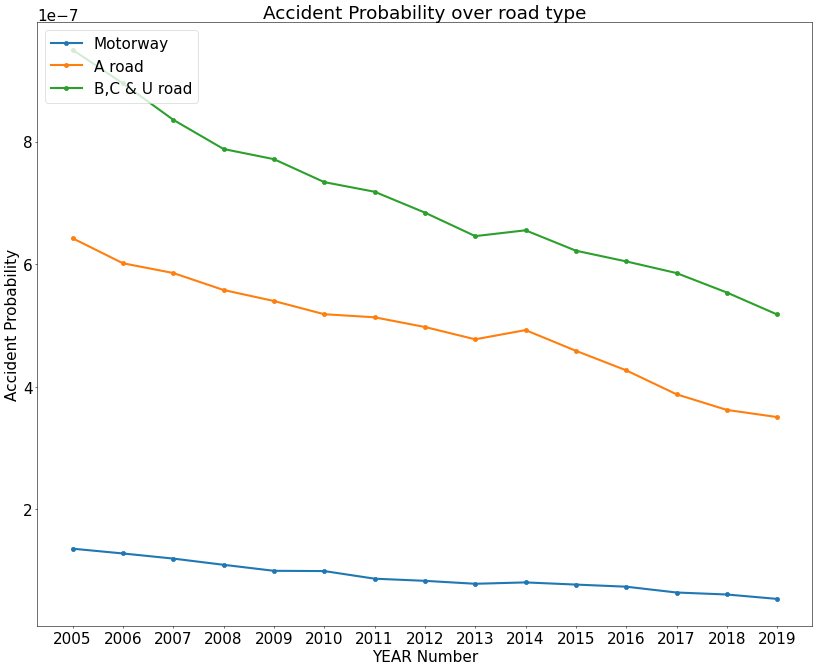

In [68]:
import pandas as pd
import matplotlib.pyplot as plt  

from matplotlib.pyplot import figure
plt.figure(figsize=(20, 16),dpi=50)
plt.rcParams.update({'font.size': 22})
#YEARList  = result23_opiv['year'].tolist()
YEARList=years
M   = result23_opiv ['Motorway'].tolist()
A   = result23_opiv ['A'].tolist()
B = result23_opiv ['B,C & U'].tolist()



plt.plot(YEARList, M,   label = 'Motorway', marker='o', linewidth=3)
plt.plot(YEARList, A,   label = 'A road',  marker='o', linewidth=3)
plt.plot(YEARList, B, label = 'B,C & U road', marker='o', linewidth=3)



plt.xlabel('YEAR Number')
plt.ylabel('Accident Probability')
plt.legend(loc='upper left')
plt.xticks(YEARList)
#plt.yticks([1000, 2000, 4000, 6000, 8000, 10000, 12000, 15000, 18000])
plt.title('Accident Probability over road type')

plt.show()

# Normalized after time

In [5]:
from pyspark.sql.functions import *
#Timestamp String to DateType
Accident_Information20052019_dfff=A2018.withColumn("timestamp",to_timestamp("time"))
Accident_Information20052019_dfff
TimeAccident_dfhour = Accident_Information20052019_dfff.withColumn('hour',hour(Accident_Information20052019_dfff.timestamp))
#Time of week accidents
TimeAccident_df = TimeAccident_dfhour.groupby('hour').agg(F.count(Accident_Information20052019_dfff.accident_index).alias('Total accidents'))
#TimeAccident_df= TimeAccident_df.withColumn('Time',F.col('Time').cast(IntegerType()))
TimeAccident_df=TimeAccident_df.sort("hour")
TimeAccident_df.head()


Row(hour=0, Total accidents=34976)

In [6]:
TimeAccident_df_df=TimeAccident_df.toPandas()
TimeAccident_df_df

hour  Total accidents
0      0            34976
1      1            25340
2      2            20055
3      3            16310
4      4            12989
5      5            19228
6      6            41476
7      7            97895
8      8           166145
9      9           112595
10    10           103173
11    11           117755
12    12           133996
13    13           137581
14    14           138775
15    15           176700
16    16           185391
17    17           202694
18    18           159655
19    19           118915
20    20            87214
21    21            69608
22    22            60838
23    23            48123

In [7]:
import pandas as pd
df = pd.read_csv ('/Users/Asfandyar/Desktop/disertation/diseration_final/weekdist.csv')
df['hour'] = df.index
df

Time of day      Monday     Tuesday   Wednesday    Thursday      Friday  \
0   00:00-01:00   103000000   108000000   114000000   117000000   126000000   
1   01:00-02:00    66000000    72000000    77000000    77000000    84000000   
2   02:00-03:00    55000000    63000000    65000000    66000000    69000000   
3   03:00-04:00    71000000    73000000    75000000    76000000    78000000   
4   04:00-05:00   141000000   131000000   131000000   131000000   130000000   
5   05:00-06:00   411000000   394000000   390000000   386000000   368000000   
6   06:00-07:00   953000000   964000000   950000000   936000000   874000000   
7   07:00-08:00  1701000000  1750000000  1729000000  1705000000  1591000000   
8   08:00-09:00  1859000000  1918000000  1911000000  1904000000  1809000000   
9   09:00-10:00  1493000000  1522000000  1523000000  1533000000  1534000000   
10  10:00-11:00  1486000000  1470000000  1482000000  1504000000  1592000000   
11  11:00-12:00  1571000000  1540000000  1562000000  1586000000  1727000000   
12  12:00-13:00  1622000000  1596000000  1626000000  1653000000  1836000000   
13  13:00-14:00  1636000000  1622000000  1655000000  1681000000  1881000000   
14  14:00-15:00  1740000000  1740000000  1782000000  1800000000  1992000000   
15  15:00-16:00  1917000000  1947000000  1980000000  1999000000  2165000000   
16  16:00-17:00  2069000000  2131000000  2140000000  2148000000  2175000000   
17  17:00-18:00  1989000000  2060000000  2075000000  2075000000  2021000000   
18  18:00-19:00  1431000000  1506000000  1529000000  1555000000  1585000000   
19  19:00-20:00   977000000  1028000000  1057000000  1095000000  1149000000   
20  20:00-21:00   682000000   714000000   738000000   767000000   801000000   
21  21:00-22:00   484000000   511000000   529000000   547000000   573000000   
22  22:00-23:00   323000000   352000000   369000000   379000000   426000000   
23  23:00-00:00   179000000   192000000   204000000   215000000   276000000   

      Saturday      Sunday  hour  
0    173000000   187000000     0  
1    112000000   117000000     1  
2     84000000    80000000     2  
3     78000000    67000000     3  
4     95000000    71000000     4  
5    195000000   128000000     5  
6    356000000   225000000     6  
7    602000000   346000000     7  
8    920000000   495000000     8  
9   1270000000   853000000     9  
10  1594000000  1280000000    10  
11  1789000000  1544000000    11  
12  1844000000  1662000000    12  
13  1787000000  1640000000    13  
14  1708000000  1584000000    14  
15  1613000000  1520000000    15  
16  1544000000  1429000000    16  
17  1423000000  1236000000    17  
18  1180000000  1053000000    18  
19   906000000   855000000    19  
20   663000000   651000000    20  
21   501000000   457000000    21  
22   400000000   300000000    22  
23   283000000   175000000    23

In [8]:

result60=pd.merge(TimeAccident_df_df, df, on=['hour'])
result60["Monday_Normalized"] = result60["Total accidents"] / result60["Monday"]
result60["Tuesday_Normalized"] = result60["Total accidents"] / result60["Tuesday"]
result60["Wednesday_Normalized"] = result60["Total accidents"] / result60["Wednesday"]
result60["Thursday_Normalized"] = result60["Total accidents"] / result60["Thursday"]
result60["Friday_Normalized"] = result60["Total accidents"] / result60["Friday"]
result60["Saturday_Normalized"] = result60["Total accidents"] / result60["Saturday"]
result60["Sunday_Normalized"] = result60["Total accidents"] / result60["Sunday"]
result60 = result60.drop(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], axis=1)
result60

hour  Total accidents  Time of day  Monday_Normalized  Tuesday_Normalized  \
0      0            34976  00:00-01:00           0.000340            0.000324   
1      1            25340  01:00-02:00           0.000384            0.000352   
2      2            20055  02:00-03:00           0.000365            0.000318   
3      3            16310  03:00-04:00           0.000230            0.000223   
4      4            12989  04:00-05:00           0.000092            0.000099   
5      5            19228  05:00-06:00           0.000047            0.000049   
6      6            41476  06:00-07:00           0.000044            0.000043   
7      7            97895  07:00-08:00           0.000058            0.000056   
8      8           166145  08:00-09:00           0.000089            0.000087   
9      9           112595  09:00-10:00           0.000075            0.000074   
10    10           103173  10:00-11:00           0.000069            0.000070   
11    11           117755  11:00-12:00           0.000075            0.000076   
12    12           133996  12:00-13:00           0.000083            0.000084   
13    13           137581  13:00-14:00           0.000084            0.000085   
14    14           138775  14:00-15:00           0.000080            0.000080   
15    15           176700  15:00-16:00           0.000092            0.000091   
16    16           185391  16:00-17:00           0.000090            0.000087   
17    17           202694  17:00-18:00           0.000102            0.000098   
18    18           159655  18:00-19:00           0.000112            0.000106   
19    19           118915  19:00-20:00           0.000122            0.000116   
20    20            87214  20:00-21:00           0.000128            0.000122   
21    21            69608  21:00-22:00           0.000144            0.000136   
22    22            60838  22:00-23:00           0.000188            0.000173   
23    23            48123  23:00-00:00           0.000269            0.000251   

    Wednesday_Normalized  Thursday_Normalized  Friday_Normalized  \
0               0.000307             0.000299           0.000278   
1               0.000329             0.000329           0.000302   
2               0.000309             0.000304           0.000291   
3               0.000217             0.000215           0.000209   
4               0.000099             0.000099           0.000100   
5               0.000049             0.000050           0.000052   
6               0.000044             0.000044           0.000047   
7               0.000057             0.000057           0.000062   
8               0.000087             0.000087           0.000092   
9               0.000074             0.000073           0.000073   
10              0.000070             0.000069           0.000065   
11              0.000075             0.000074           0.000068   
12              0.000082             0.000081           0.000073   
13              0.000083             0.000082           0.000073   
14              0.000078             0.000077           0.000070   
15              0.000089             0.000088           0.000082   
16              0.000087             0.000086           0.000085   
17              0.000098             0.000098           0.000100   
18              0.000104             0.000103           0.000101   
19              0.000113             0.000109           0.000103   
20              0.000118             0.000114           0.000109   
21              0.000132             0.000127           0.000121   
22              0.000165             0.000161           0.000143   
23              0.000236             0.000224           0.000174   

    Saturday_Normalized  Sunday_Normalized  
0              0.000202           0.000187  
1              0.000226           0.000217  
2              0.000239           0.000251  
3              0.000209           0.000243  
4              0.000137           0.000183  
5      

In [9]:
result61=result60
column_list = list(result61)
column_list.remove("Time of day")
column_list.remove("hour")
column_list.remove("Total accidents")

result61["Total accidents_Normalized"] = result61[column_list].sum(axis=1)
result61

hour  Total accidents  Time of day  Monday_Normalized  Tuesday_Normalized  \
0      0            34976  00:00-01:00           0.000340            0.000324   
1      1            25340  01:00-02:00           0.000384            0.000352   
2      2            20055  02:00-03:00           0.000365            0.000318   
3      3            16310  03:00-04:00           0.000230            0.000223   
4      4            12989  04:00-05:00           0.000092            0.000099   
5      5            19228  05:00-06:00           0.000047            0.000049   
6      6            41476  06:00-07:00           0.000044            0.000043   
7      7            97895  07:00-08:00           0.000058            0.000056   
8      8           166145  08:00-09:00           0.000089            0.000087   
9      9           112595  09:00-10:00           0.000075            0.000074   
10    10           103173  10:00-11:00           0.000069            0.000070   
11    11           117755  11:00-12:00           0.000075            0.000076   
12    12           133996  12:00-13:00           0.000083            0.000084   
13    13           137581  13:00-14:00           0.000084            0.000085   
14    14           138775  14:00-15:00           0.000080            0.000080   
15    15           176700  15:00-16:00           0.000092            0.000091   
16    16           185391  16:00-17:00           0.000090            0.000087   
17    17           202694  17:00-18:00           0.000102            0.000098   
18    18           159655  18:00-19:00           0.000112            0.000106   
19    19           118915  19:00-20:00           0.000122            0.000116   
20    20            87214  20:00-21:00           0.000128            0.000122   
21    21            69608  21:00-22:00           0.000144            0.000136   
22    22            60838  22:00-23:00           0.000188            0.000173   
23    23            48123  23:00-00:00           0.000269            0.000251   

    Wednesday_Normalized  Thursday_Normalized  Friday_Normalized  \
0               0.000307             0.000299           0.000278   
1               0.000329             0.000329           0.000302   
2               0.000309             0.000304           0.000291   
3               0.000217             0.000215           0.000209   
4               0.000099             0.000099           0.000100   
5               0.000049             0.000050           0.000052   
6               0.000044             0.000044           0.000047   
7               0.000057             0.000057           0.000062   
8               0.000087             0.000087           0.000092   
9               0.000074             0.000073           0.000073   
10              0.000070             0.000069           0.000065   
11              0.000075             0.000074           0.000068   
12              0.000082             0.000081           0.000073   
13              0.000083             0.000082           0.000073   
14              0.000078             0.000077           0.000070   
15              0.000089             0.000088           0.000082   
16              0.000087             0.000086           0.000085   
17              0.000098             0.000098           0.000100   
18              0.000104             0.000103           0.000101   
19              0.000113             0.000109           0.000103   
20              0.000118             0.000114           0.000109   
21              0.000132             0.000127           0.000121   
22              0.000165             0.000161           0.000143   
23              0.000236             0.000224           0.000174   

    Saturday_Normalized  Sunday_Normalized  Total accidents_Normalized  
0              0.000202           0.000187                    0.001936  
1              0.000226           0.000217                    0.002139  
2              0.000239           0.000251                

In [10]:

result61_U = result61.drop(['Total accidents',	'Time of day',	'Monday_Normalized',	'Tuesday_Normalized',	'Wednesday_Normalized',	'Thursday_Normalized',	'Friday_Normalized',	'Saturday_Normalized',	'Sunday_Normalized'], axis=1)
result61_U

hour  Total accidents_Normalized
0      0                    0.001936
1      1                    0.002139
2      2                    0.002075
3      3                    0.001547
4      4                    0.000809
5      5                    0.000496
6      6                    0.000523
7      7                    0.000735
8      8                    0.000958
9      9                    0.000591
10    10                    0.000488
11    11                    0.000511
12    12                    0.000556
13    13                    0.000568
14    14                    0.000553
15    15                    0.000668
16    16                    0.000685
17    17                    0.000802
18    18                    0.000812
19    19                    0.000832
20    20                    0.000856
21    21                    0.000952
22    22                    0.001184
23    23                    0.001599

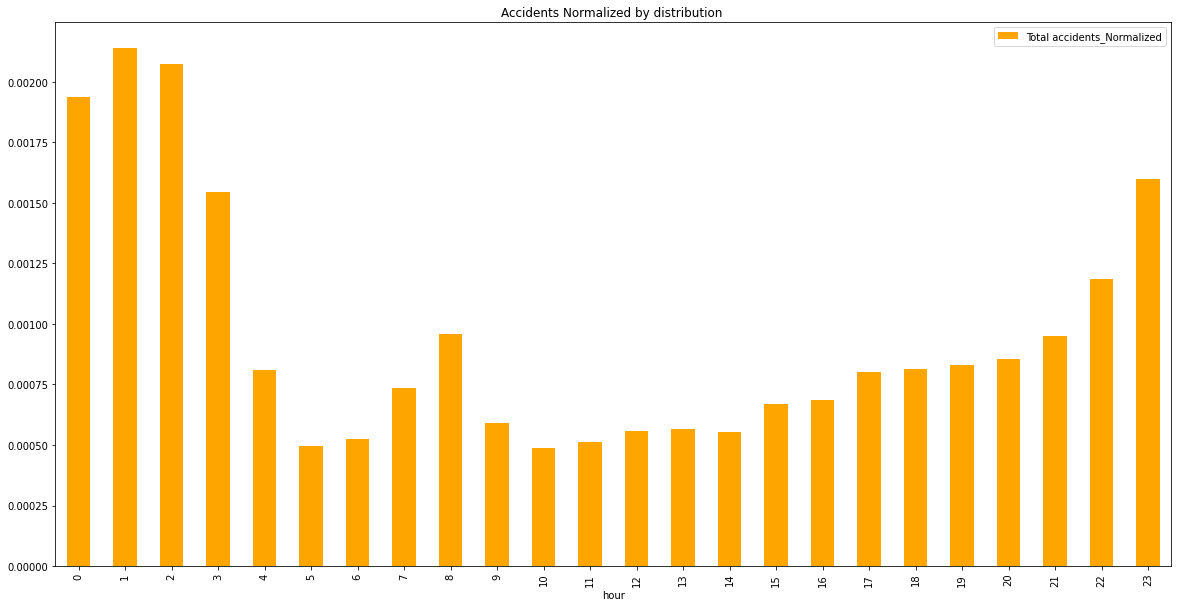

In [11]:
ax=result61_U.plot.bar('hour','Total accidents_Normalized', rot=90,title="Accidents Normalized by distribution ",figsize=(20, 10),color="Orange")

# Over the years

In [111]:
TrafficvolumeGroupedupdated.show()

+---------+----+------------------+
|road_name|year|all_motor_vehicles|
+---------+----+------------------+
|        A|2005|                 8|
|        A|2005|                 3|
|        A|2005|                13|
|        A|2005|                14|
|        A|2005|                11|
|        A|2005|                11|
|        A|2005|                13|
|        A|2005|                13|
|        A|2005|                13|
|        A|2005|                10|
|        A|2005|                17|
|        A|2005|                 4|
|        A|2005|                 5|
|        A|2005|                13|
|        A|2005|                12|
|        A|2005|                 7|
|        A|2005|                16|
|        A|2005|                 7|
|        A|2005|                 9|
|        A|2005|                18|
+---------+----+------------------+
only showing top 20 rows



In [116]:
road_length_traffic

road_name
0         B
1         M
2         U
3         C
4         A

In [102]:
A2018t_df_notyear = A2018.groupby("first_road_class").agg(F.count(A2018.accident_index).alias('Total accidents'))
A2018t_df_notyear = A2018t_df_notyear.withColumnRenamed("first_road_class", "road_name")
A2018t_df_notyear_df=A2018t_df_notyear.toPandas()


TrafficvolumeGrouped_notyear=TrafficvolumeGroupedupdated.select(col("road_name"),col("all_motor_vehicles"))
TrafficvolumeGrouped_notyear = TrafficvolumeGrouped_notyear.groupby('road_name').agg(F.sum(TrafficvolumeGroupedupdated['all_motor_vehicles']).alias('all_motor_vehicles'))

TrafficvolumeGrouped_notyear_df=TrafficvolumeGrouped_notyear.toPandas()






KeyError: 'Trafficvolume'

In [120]:
road_length_total = pd.read_csv ('/Users/Asfandyar/Desktop/disertation/diseration_final/road_length.csv')
road_length_traffic=pd.merge(TrafficvolumeGrouped_notyear_df, road_length_total, on=['road_name'])
road_length_traffic["link_length_km"]=road_length_traffic["link_length_km"].str.replace(',','')
road_length_traffic["link_length_km"] = road_length_traffic["link_length_km"].astype(float)
road_length_traffic["Trafficvolume"] = road_length_traffic["all_motor_vehicles"] * road_length_traffic["link_length_km"]
road_length_traffic=road_length_traffic.drop(['all_motor_vehicles', 'link_length_km'], axis=1)
result24=pd.merge(A2018t_df_notyear_df, road_length_traffic, on=['road_name'])
result24

road_name  Total accidents  Trafficvolume
0         B           286824   2.057755e+12
1         M            86106   8.846338e+11
2         U           687752   1.175274e+13
3         C           188025   3.374912e+12
4         A          1038720   3.126184e+13

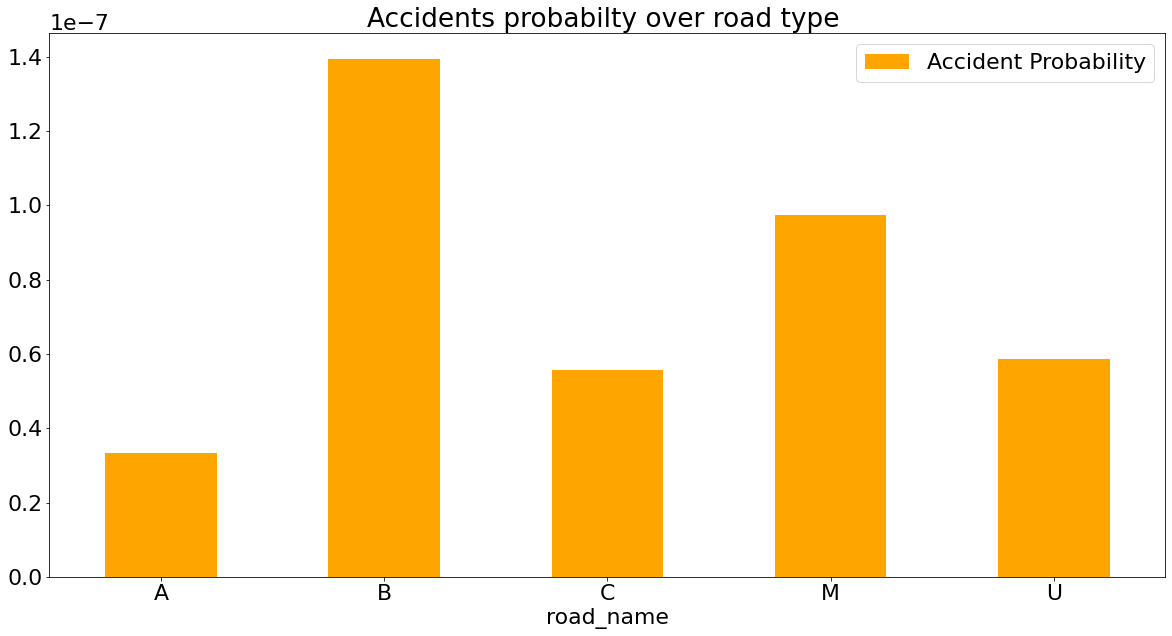

In [122]:
result24=pd.merge(A2018t_df_notyear_df, road_length_traffic, on=['road_name'])
result24["Accident Probability"] = result24["Total accidents"] / result24["Trafficvolume"]
result24=result24.drop(['Total accidents', 'Trafficvolume'], axis=1)
result24=result24.sort_values('road_name')
ax=result24.plot.bar('road_name','Accident Probability', rot=0,title="Accidents probabilty over road type ",figsize=(20, 10),color="Orange")

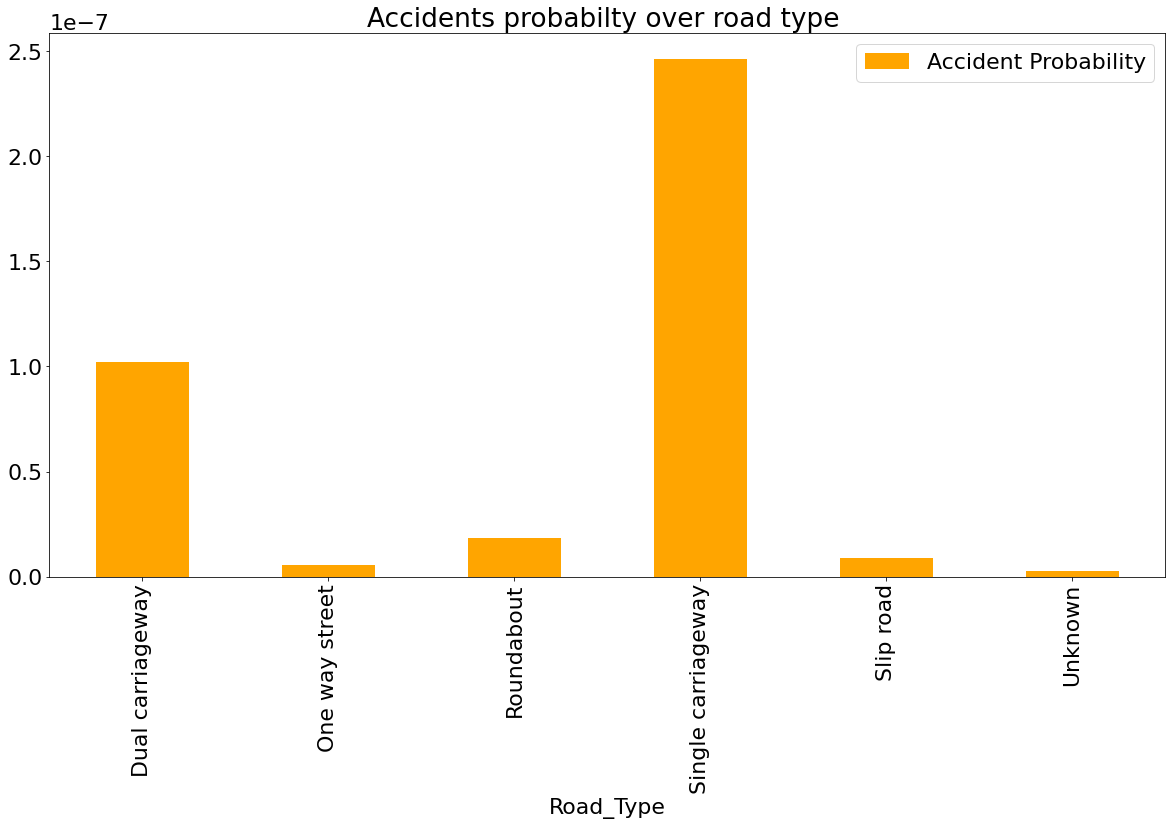

In [123]:
A2018=A2018.withColumn(
    "Road_Type",
    when(
        col("Road_Type") == 1,
        "Roundabout"
    ).when(
        col("Road_Type") == 2,
        "One way street"
    ).when(
        col("Road_Type") == 3,
        "Dual carriageway"
    ).when(
        col("Road_Type") == 6,
        "Single carriageway"
    ).when(
        col("Road_Type") == 7,
        "Slip road"
    ).when(
        col("Road_Type") == 9,
        "Unknown"
    ).when(
        col("Road_Type") == 12,
        "One way street/Slip road"
    ).when(
        col("Road_Type") == -1,
        "Data missing or out of range"
    ).otherwise(col("Road_Type"))
)
dangeorusroadtype = A2018.groupby('Road_Type','first_road_class').agg(F.count(A2018.accident_index).alias('Total accidents'))
dangeorusroadtype_df=dangeorusroadtype.toPandas()

dangeorusroadtype_df=dangeorusroadtype_df.rename(columns={"first_road_class": "road_name"})

result30=pd.merge(dangeorusroadtype_df, road_length_traffic, on=['road_name'])

result30["Accident Probability"] = result30["Total accidents"] / result30["Trafficvolume"]
result30=result30.drop(['Total accidents', 'Trafficvolume'], axis=1)
result30=result30.drop(['road_name'], axis=1)
result30_df = result30.groupby('Road_Type', sort=False)["Accident Probability"].sum().reset_index(name ='Accident Probability')
result30_df=result30_df.drop(labels=[6],axis=0)
result30_df=result30_df.sort_values('Road_Type')
ax=result30_df.plot.bar('Road_Type','Accident Probability', rot=90,title="Accidents probabilty over road type ",figsize=(20, 10),color="Orange")


In [12]:
A2018=A2018.withColumn(
    "Road_Type",
    when(
        col("Road_Type") == 1,
        "Roundabout"
    ).when(
        col("Road_Type") == 2,
        "One way street"
    ).when(
        col("Road_Type") == 3,
        "Dual carriageway"
    ).when(
        col("Road_Type") == 6,
        "Single carriageway"
    ).when(
        col("Road_Type") == 7,
        "Slip road"
    ).when(
        col("Road_Type") == 9,
        "Unknown"
    ).when(
        col("Road_Type") == 12,
        "One way street/Slip road"
    ).when(
        col("Road_Type") == -1,
        "Data missing or out of range"
    ).otherwise(col("Road_Type"))
)

In [ ]:
roadtype1=A2018.select(col("Road_Type"),col("longitude"),col("latitude"))
Accident_Information20052019points=roadtype1.select(col("Longitude"),col("Latitude"),col("Year"),concat(Accident_Information20052019points['1st_Road_Class'],Accident_Information20052019points['1st_Road_Number']).alias("road_name"))
Accident_Information20052019points=Accident_Information20052019points.filter(Accident_Information20052019points.road_name=="A51")
Accident_Information20052019points.show()

In [13]:
roadtype = A2018.groupby('Road_Type','longitude','latitude').agg(F.count(A2018.accident_index).alias('Total accidents'))
roadtype.show()

+------------------+---------+---------+---------------+
|         Road_Type|longitude| latitude|Total accidents|
+------------------+---------+---------+---------------+
|Single carriageway|-0.170782|51.501819|              1|
|Single carriageway|-0.206827|51.523238|              2|
|Single carriageway|-0.201912|51.497984|              2|
|    One way street|-0.135473|51.498475|              1|
|Single carriageway|-0.167087|51.529279|              1|
|Single carriageway|-0.193582|51.526452|              3|
|    One way street|-0.151663|51.518515|              2|
|Single carriageway|-0.193442| 51.52636|              4|
|    One way street|-0.133996|51.509962|              1|
|    One way street|-0.130422| 51.51629|              4|
|Single carriageway|-0.125741|51.496881|             15|
|  Dual carriageway|-0.154789|51.508942|              1|
|Single carriageway|-0.131944| 51.49671|              1|
|Single carriageway|-0.147967|51.506586|              5|
|Single carriageway|-0.090806|5

In [39]:
roadtype_spark=roadtype.toPandas()
roadtype

DataFrame[Road_Type: string, longitude: string, latitude: string, Total accidents: bigint]

In [40]:
roadtype_spark

Road_Type  longitude   latitude  Total accidents
0        Single carriageway  -0.170782  51.501819                1
1        Single carriageway  -0.206827  51.523238                2
2        Single carriageway  -0.201912  51.497984                2
3            One way street  -0.135473  51.498475                1
4        Single carriageway  -0.167087  51.529279                1
...                     ...        ...        ...              ...
2015739  Single carriageway  -4.287365  55.872205                1
2015740  Single carriageway   -4.25897  55.828063                1
2015741  Single carriageway  -4.288574  55.882689                1
2015742  Single carriageway  -4.175269   55.85861                1
2015743  Single carriageway   -3.87831  55.785517                1

[2015744 rows x 4 columns]

In [14]:
Trafficvolume = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/dft_traffic_counts_aadf.csv')
# changing the type of column("Year'") to interger type
Trafficvolume = Trafficvolume.withColumn('year',F.col('year').cast(IntegerType()))
Trafficvolume=Trafficvolume.filter(Trafficvolume.year>2004)
Trafficvolume=Trafficvolume.filter(Trafficvolume.year<2020)
Trafficvolume.sort("year").show(truncate=False)

+--------------+----+---------+-----------+---------------+------------------+---------------------+--------------------+---------+-------------+---------+------------------------+----------------------+-------+--------+------------+------------+--------------+-------------------+-----------------+-------------------------------------------------+------------+--------------------------+--------------+-----------------+-----+-----------------+-----------------+-------------------------+----------------------------+-----------------------+-----------------------+--------+------------------+
|Count_point_id|year|Region_id|Region_name|Region_ons_code|Local_authority_id|Local_authority_name |Local_authority_code|Road_name|Road_category|Road_type|Start_junction_road_name|End_junction_road_name|Easting|Northing|Latitude    |Longitude   |Link_length_km|Link_length_miles  |Estimation_method|Estimation_method_detailed                       |Pedal_cycles|Two_wheeled_motor_vehicles|Cars_and_taxis|

In [17]:
Trafficvolume.show()

+--------------+----+---------+-----------+---------------+------------------+--------------------+--------------------+---------+-------------+---------+------------------------+----------------------+-------+--------+------------+------------+--------------+-------------------+-----------------+--------------------------+------------+--------------------------+--------------+-----------------+-----+-----------------+-----------------+-------------------------+----------------------------+-----------------------+-----------------------+--------+------------------+
|Count_point_id|year|Region_id|Region_name|Region_ons_code|Local_authority_id|Local_authority_name|Local_authority_code|Road_name|Road_category|Road_type|Start_junction_road_name|End_junction_road_name|Easting|Northing|    Latitude|   Longitude|Link_length_km|  Link_length_miles|Estimation_method|Estimation_method_detailed|Pedal_cycles|Two_wheeled_motor_vehicles|Cars_and_taxis|Buses_and_coaches| LGVs|HGVs_2_rigid_axle|HGVs_3

In [23]:
Trafficvolumepoints=Trafficvolume.select(col("Count_point_id"),col("longitude"),col("latitude"),col("Link_length_miles"),col("All_motor_vehicles"))
Trafficvolumepoints.show()

+--------------+------------+------------+-------------------+------------------+
|Count_point_id|   longitude|    latitude|  Link_length_miles|All_motor_vehicles|
+--------------+------------+------------+-------------------+------------------+
|            51|-6.317072964|49.915022920| .19000000000000000|               948|
|            52|-6.305685679|49.912342659|1.24000000000000000|               883|
|            53|-6.306113756|49.917140810| .75000000000000000|              1408|
|            54|-6.298996455|49.917810282| .12000000000000000|               896|
|            55|-6.295093656|49.918585039|2.49000000000000000|               327|
|           501|-3.032184269|51.577320306|1.37000000000000000|            114804|
|           502|-3.720044465|51.525189997|1.80000000000000000|             62191|
|           503|-3.981299876|51.675378776|1.80000000000000000|             55994|
|           505|-4.158239803|53.220081427|1.80000000000000000|             12569|
|           506|

In [24]:
Trafficvolumepoints=Trafficvolumepoints.toPandas()
Trafficvolumepoints['longitude'] = Trafficvolumepoints['longitude'].astype(float)
Trafficvolumepoints['latitude'] = Trafficvolumepoints['latitude'].astype(float)
Trafficvolumepoints
Trafficvolumepoints.sort_values(by=['Count_point_id'])

Count_point_id  longitude   latitude    Link_length_miles  \
329793           1000  -4.139833  55.869526  1.12000000000000000   
211127           1000  -4.139833  55.869528  1.12000000000000000   
233871           1000  -4.139833  55.869528  1.12000000000000000   
121187           1000  -4.139833  55.869528  1.12000000000000000   
66505            1000  -4.139833  55.869528  1.12000000000000000   
...               ...        ...        ...                  ...   
121028         999999  -1.332606  51.355174                 None   
94338          999999  -1.332606  51.355174                 None   
66346          999999  -1.332606  51.355174                 None   
44343          999999  -1.332606  51.355174                 None   
22119          999999  -1.332606  51.355174                 None   

       All_motor_vehicles  
329793              87649  
211127              88207  
233871              88858  
121187             120384  
66505              111253  
...                   ...  
121028               6886  
94338                7726  
66346                7203  
44343                7204  
22119                6892  

[362550 rows x 5 columns]

In [27]:
Trafficvolumepoints=Trafficvolume.select(col("Count_point_id"),col("longitude"),col("latitude"),col("Link_length_miles"),col("All_motor_vehicles"))
Trafficvolumepoints = Trafficvolumepoints.groupby('Count_point_id','longitude','latitude').agg(F.count(Trafficvolumepoints.Count_point_id).alias('number of times'))
Trafficvolumepoints.sort(col('Count_point_id').desc())
Trafficvolumepoints=Trafficvolumepoints.toPandas()
Trafficvolumepoints['longitude'] = Trafficvolumepoints['longitude'].astype(float)
Trafficvolumepoints['latitude'] = Trafficvolumepoints['latitude'].astype(float)
Trafficvolumepoints
Trafficvolumepoints.sort_values(by=['Count_point_id'])

Count_point_id  longitude   latitude  number of times
3066            1000  -4.139833  55.869528               13
34024           1000  -4.139833  55.869526                2
55057           1001  -4.243721  55.869385               13
46011           1001  -4.243720  55.869383                2
853             1004  -4.096664  55.839624                2
...              ...        ...        ...              ...
2486          999994  -0.108731  51.368788                5
35394         999995  -2.686455  52.964380                3
1805          999996   0.395456  51.874254                4
17036         999997  -0.506198  50.807358                4
59923         999999  -1.332606  51.355174                5

[69080 rows x 4 columns]

In [28]:
Trafficvolumepoints

Count_point_id  longitude   latitude  number of times
0               1119  -4.720427  57.367016               13
1               6871  -0.104098  51.498207               13
2               7123  -1.588269  52.280898               13
3               7499  -1.630728  55.068909               13
4               7551  -0.178150  50.830306               13
...              ...        ...        ...              ...
69075         811341  -4.723405  55.277716                1
69076         811564  -4.131090  56.598905                1
69077         811569  -2.990135  56.484969                1
69078         812043  -1.187613  60.353261                1
69079         941849   1.026896  52.922097                1

[69080 rows x 4 columns]

In [29]:
Trafficvolumepoints=Trafficvolumepoints.drop(columns=['number of times'])
Trafficvolumepoints
Trafficvolumepoints["coordinates"] = list(zip(Trafficvolumepoints["longitude"] , Trafficvolumepoints["latitude"]))
Trafficvolumepoints

Count_point_id  longitude   latitude                   coordinates
0               1119  -4.720427  57.367016  (-4.720427161, 57.367015644)
1               6871  -0.104098  51.498207  (-0.104098441, 51.498207386)
2               7123  -1.588269  52.280898  (-1.588269169, 52.280898317)
3               7499  -1.630728  55.068909  (-1.630728357, 55.068908918)
4               7551  -0.178150  50.830306  (-0.178149938, 50.830305808)
...              ...        ...        ...                           ...
69075         811341  -4.723405  55.277716       (-4.7234053, 55.277716)
69076         811564  -4.131090  56.598905       (-4.1310899, 56.598905)
69077         811569  -2.990135  56.484969       (-2.9901353, 56.484969)
69078         812043  -1.187613  60.353261       (-1.1876129, 60.353261)
69079         941849   1.026896  52.922097        (1.0268962, 52.922097)

[69080 rows x 4 columns]

In [22]:
Trafficvolumepoints=Trafficvolumepoints.drop(columns=['number of times'])
Trafficvolumepoints
Trafficvolumepoints["coordinates"] = list(zip(Trafficvolumepoints["longitude"] , Trafficvolumepoints["latitude"]))
Trafficvolumepoints

Count_point_id  longitude   latitude                   coordinates
0               1119  -4.720427  57.367016  (-4.720427161, 57.367015644)
1               6871  -0.104098  51.498207  (-0.104098441, 51.498207386)
2               7123  -1.588269  52.280898  (-1.588269169, 52.280898317)
3               7499  -1.630728  55.068909  (-1.630728357, 55.068908918)
4               7551  -0.178150  50.830306  (-0.178149938, 50.830305808)
...              ...        ...        ...                           ...
69075         811341  -4.723405  55.277716       (-4.7234053, 55.277716)
69076         811564  -4.131090  56.598905       (-4.1310899, 56.598905)
69077         811569  -2.990135  56.484969       (-2.9901353, 56.484969)
69078         812043  -1.187613  60.353261       (-1.1876129, 60.353261)
69079         941849   1.026896  52.922097        (1.0268962, 52.922097)

[69080 rows x 4 columns]

In [42]:
roadtype_spark

Road_Type  longitude   latitude  Total accidents
0        Single carriageway  -0.170782  51.501819                1
1        Single carriageway  -0.206827  51.523238                2
2        Single carriageway  -0.201912  51.497984                2
3            One way street  -0.135473  51.498475                1
4        Single carriageway  -0.167087  51.529279                1
...                     ...        ...        ...              ...
2015739  Single carriageway  -4.287365  55.872205                1
2015740  Single carriageway   -4.25897  55.828063                1
2015741  Single carriageway  -4.288574  55.882689                1
2015742  Single carriageway  -4.175269   55.85861                1
2015743  Single carriageway   -3.87831  55.785517                1

[2015744 rows x 4 columns]

In [45]:
roadtype_spark = roadtype_spark.dropna()
roadtype_spark

Road_Type  longitude   latitude  Total accidents
0        Single carriageway  -0.170782    51.5018                1
1        Single carriageway  -0.206827    51.5232                2
2        Single carriageway  -0.201912     51.498                2
3            One way street  -0.135473    51.4985                1
4        Single carriageway  -0.167087    51.5293                1
...                     ...        ...        ...              ...
2015739  Single carriageway  -4.287365  55.872205                1
2015740  Single carriageway   -4.25897  55.828063                1
2015741  Single carriageway  -4.288574  55.882689                1
2015742  Single carriageway  -4.175269   55.85861                1
2015743  Single carriageway   -3.87831  55.785517                1

[2015744 rows x 4 columns]

In [68]:
roadtype_spark1=roadtype_spark
roadtype_spark1=roadtype_spark1.dropna().reset_index(drop=True)


In [77]:
roadtype_spark1=roadtype_spark1[roadtype_spark1['longitude']!="NULL"]

In [78]:
roadtype_spark1['longitude'] = roadtype_spark1['longitude'].astype(float)
roadtype_spark1['latitude'] = roadtype_spark1['latitude'].astype(float)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:

roadtype_spark["coordinates"] = list(zip(roadtype_spark["longitude"] , roadtype_spark["latitude"]))

roadtype_spark

Road_Type  longitude   latitude  Total accidents  \
0        Single carriageway  -0.170782    51.5018                1   
1        Single carriageway  -0.206827    51.5232                2   
2        Single carriageway  -0.201912     51.498                2   
3            One way street  -0.135473    51.4985                1   
4        Single carriageway  -0.167087    51.5293                1   
...                     ...        ...        ...              ...   
2015739  Single carriageway  -4.287365  55.872205                1   
2015740  Single carriageway   -4.25897  55.828063                1   
2015741  Single carriageway  -4.288574  55.882689                1   
2015742  Single carriageway  -4.175269   55.85861                1   
2015743  Single carriageway   -3.87831  55.785517                1   

                    coordinates  
0        (-0.170782, 51.501819)  
1        (-0.206827, 51.523238)  
2        (-0.201912, 51.497984)  
3        (-0.135473, 51.498475)  
4        (-0.167087, 51.529279)  
...                         ...  
2015739  (-4.287365, 55.872205)  
2015740   (-4.25897, 55.828063)  
2015741  (-4.288574, 55.882689)  
2015742   (-4.175269, 55.85861)  
2015743   (-3.87831, 55.785517)  

[2015744 rows x 5 columns]

In [84]:
type(Trafficvolumepoints["coordinates"][0][0])

float

In [87]:
def SED(X, Y):
    #Squared Eucliden distance is computed between the x and y.
    return sum((i-j)**2 for i, j in zip(X, Y))
    
def nearest_neighbor_bf(*, query_points,reference_points):
    #Nearest neighbor are found to the nearest coordinate
    for query_p in query_points['coordinates']:
        datad2.append(query_p)
        datad.append( min(
            reference_points,
            print(reference_points),
            key=lambda X: SED(X, query_p))
        )
    return datad,datad2
datad=[]
datad2=[]
reference_points =Trafficvolumepoints["coordinates"]
query_points = roadtype_spark
count_point_id = Trafficvolumepoints["Count_point_id"]

points=nearest_neighbor_bf(
    query_points = query_points,reference_points=reference_points
)
points

0        (-4.720427161, 57.367015644)
1        (-0.104098441, 51.498207386)
2        (-1.588269169, 52.280898317)
3        (-1.630728357, 55.068908918)
4        (-0.178149938, 50.830305808)
                     ...             
69075         (-4.7234053, 55.277716)
69076         (-4.1310899, 56.598905)
69077         (-2.9901353, 56.484969)
69078         (-1.1876129, 60.353261)
69079          (1.0268962, 52.922097)
Name: coordinates, Length: 69080, dtype: object


TypeError: min() got an unexpected keyword argument 'key'

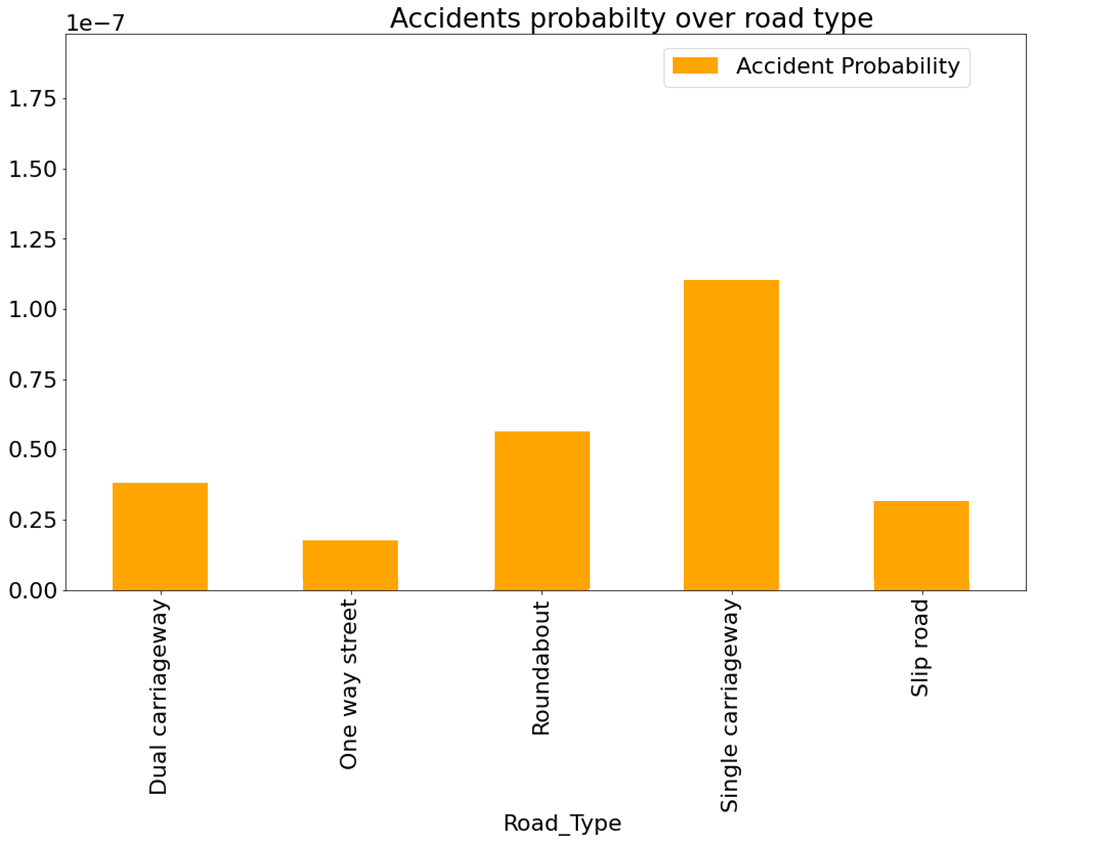

In [91]:
dangeorusroadtype = A2018.groupby('Road_Type','first_road_class').agg(F.count(A2018.accident_index).alias('Total accidents'))
dangeorusroadtype_df=dangeorusroadtype.toPandas()

dangeorusroadtype_df=dangeorusroadtype_df.rename(columns={"first_road_class": "road_name"})

result30=pd.merge(dangeorusroadtype_df, road_length_traffic, on=['road_name'])

result30["Accident Probability"] = result30["Total accidents"] / result30["Trafficvolume"]
result30=result30.drop(['Total accidents', 'Trafficvolume'], axis=1)
result30=result30.drop(['road_name'], axis=1)
result30_df = result30.groupby('Road_Type', sort=False)["Accident Probability"].sum().reset_index(name ='Accident Probability')
result30_df=result30_df.drop(labels=[6],axis=0)
result30_df=result30_df.sort_values('Road_Type')
ax=result30_df.plot.bar('Road_Type','Accident Probability', rot=90,title="Accidents probabilty over road type ",figsize=(20, 10),color="Orange")

In [171]:
A20188=A2018.withColumn("date",col("date").cast("string"))

In [172]:
A20188.show(1)

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_ons_district|local_authority_highway|f

In [177]:
Trafficvolume.printSchema()

root
 |-- Count_point_id: string (nullable = true)
 |-- Direction_of_travel: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Count_date: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- Region_id: string (nullable = true)
 |-- Region_name: string (nullable = true)
 |-- Region_ons_code: string (nullable = true)
 |-- Local_authority_id: string (nullable = true)
 |-- Local_authority_name: string (nullable = true)
 |-- Local_authority_code: string (nullable = true)
 |-- Road_name: string (nullable = true)
 |-- Road_category: string (nullable = true)
 |-- Road_type: string (nullable = true)
 |-- Start_junction_road_name: string (nullable = true)
 |-- End_junction_road_name: string (nullable = true)
 |-- Easting: string (nullable = true)
 |-- Northing: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Link_length_km: string (nullable = true)
 |-- Link_length_miles: string (nullable = true)
 |-- P

In [183]:
A2018_df2.show()

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+---------+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_ons_district|local_authority

In [196]:
A2018_df2 = A2018_df2.withColumn('timestamp', F.col('date').cast("timestamp"))
A2018_df2.show()

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+-------------------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+-------------------+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|               date|day_of_week| time|local_authority_district|local_authority_

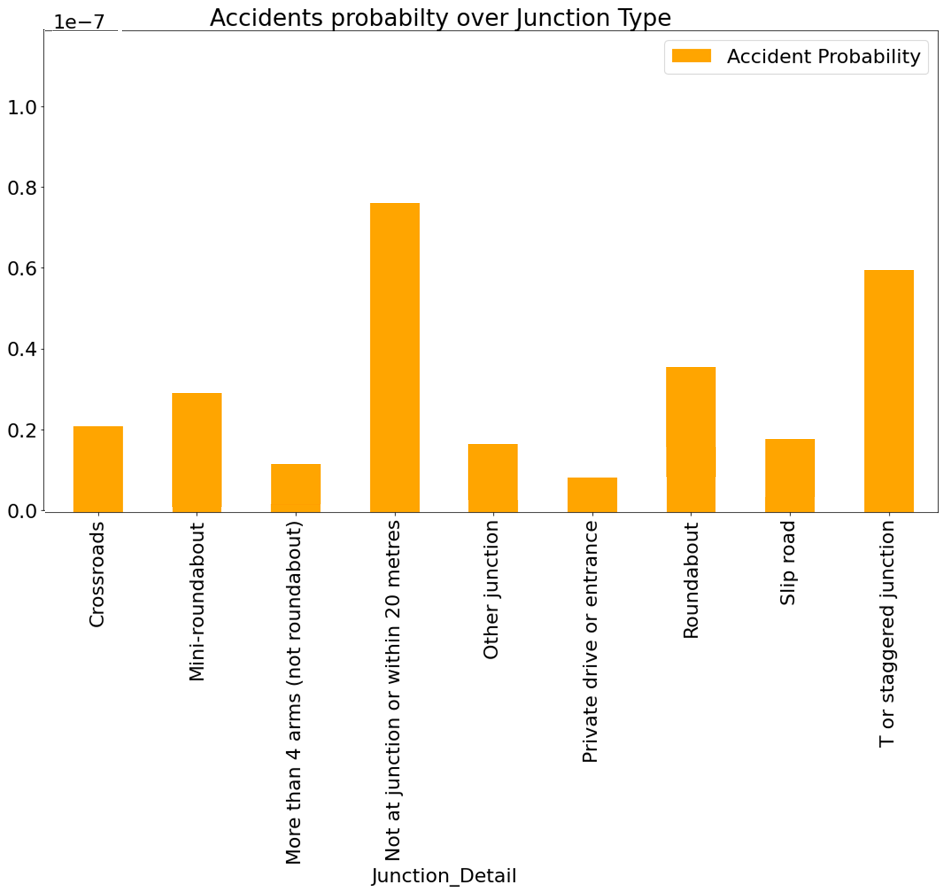

In [92]:
dangeorusroadtype = A2018.groupby('Road_Type','first_road_class').agg(F.count(A2018.accident_index).alias('Total accidents'))
dangeorusroadtype_df=dangeorusroadtype.toPandas()

dangeorusroadtype_df=dangeorusroadtype_df.rename(columns={"first_road_class": "road_name"})

result30=pd.merge(dangeorusroadtype_df, road_length_traffic, on=['road_name'])

result30["Accident Probability"] = result30["Total accidents"] / result30["Trafficvolume"]
result30=result30.drop(['Total accidents', 'Trafficvolume'], axis=1)
result30=result30.drop(['road_name'], axis=1)
result30_df = result30.groupby('Road_Type', sort=False)["Accident Probability"].sum().reset_index(name ='Accident Probability')
result30_df=result30_df.drop(labels=[6],axis=0)
result30_df=result30_df.sort_values('Road_Type')
ax=result30_df.plot.bar('Road_Type','Accident Probability', rot=90,title="Accidents probabilty over road type ",figsize=(20, 10),color="Orange")

In [197]:
from pyspark.sql.functions import *

#Accident_Information_df
TimeAccident_dfmonth = A2018_df2.withColumn('month',month(A2018_df2.timestamp))
TimeAccident_dfmonth.show()

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+-------------------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+-------------------+-----+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|               date|day_of_week| time|local_authority_district|local_auth

In [193]:
from pyspark.sql import functions as F
A2018_df2=A20188.withColumn("date", to_date("date", "dd/MM/yyyy"))




In [198]:
TimeAccident_dfmonth.show(60)

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+-------------------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+-------------------+-----+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|               date|day_of_week| time|local_authority_district|local_auth

In [199]:

TimeAccident_dfmonthly_new=TimeAccident_dfmonth.withColumn(
    "month",
    when(
        col("month") == 1,
        "January"
    ).
    when(
        col("month") == 2,
        "Februray"
    ).
    when(
        col("month") == 3,
        "March"
    ).
    when(
        col("month") == 4,
        "April"
    ).
    when(
        col("month") == 5,
        "May"
    ).
    when(
        col("month") == 6,
        "June"
    ).
    when(
        col("month") == 7,
        "July"
    ).
    when(
        col("month") == 8,
        "August"
    ).
    when(
        col("month") == 9,
        "September"
    ).
    when(
        col("month") == 10,
        "October"
    ).
    when(
        col("month") == 11,
        "November"
    ).
    when(
        col("month") == 12,
        "December"
    ).otherwise(col("month")),
)

In [200]:
TimeAccident_dfmonthly_new.show()

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+-------------------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+-------------------+-------+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|               date|day_of_week| time|local_authority_district|local_au

In [207]:
TimeAccident_dfmonthly_new_df = TimeAccident_dfmonthly_new.groupby('month').agg(F.count(TimeAccident_dfmonthly_new.accident_index).alias('Total accidents'))
#TimeAccident_dfmonthly_new_df=TimeAccident_dfmonthly_new_df.sort("month")
TimeAccident_dfmonthly_new_df.show()

+---------+---------------+
|    month|Total accidents|
+---------+---------------+
|     July|         201161|
| November|         209588|
|  January|         184490|
|    March|         182482|
|  October|         205207|
|      May|         193802|
|   August|         186789|
|    April|         175254|
|     June|         194286|
| December|         187478|
| Februray|         170157|
|September|         196733|
+---------+---------------+



In [281]:
import pandas as pd
month = pd.read_csv ('/Users/Asfandyar/Desktop/disertation/monthly traffic.csv')
month

month  Traffic volume
0     January       89.566667
1    Februray       94.466667
2       March       98.266667
3       April      100.566667
4         May      101.933333
5        June      103.966667
6        July      104.766667
7      August      104.900000
8   September      104.366667
9     October      103.200000
10   November      100.133333
11   December       93.533333

In [268]:
TimeAccident_dfmonthly_new_df_df=TimeAccident_dfmonthly_new_df.toPandas()
TimeAccident_dfmonthly_new_df_df

month  Total accidents
0        July           201161
1    November           209588
2     January           184490
3       March           182482
4     October           205207
5         May           193802
6      August           186789
7       April           175254
8        June           194286
9    December           187478
10   Februray           170157
11  September           196733

In [388]:
result23=pd.merge(month, TimeAccident_dfmonthly_new_df_df, on=['month'])
result23

month  Traffic volume  Total accidents
0     January       89.566667           184490
1    Februray       94.466667           170157
2       March       98.266667           182482
3       April      100.566667           175254
4         May      101.933333           193802
5        June      103.966667           194286
6        July      104.766667           201161
7      August      104.900000           186789
8   September      104.366667           196733
9     October      103.200000           205207
10   November      100.133333           209588
11   December       93.533333           187478

In [389]:
result23["Accident Distribution"] = result23["Total accidents"] / result23["Traffic volume"]
result23

month  Traffic volume  Total accidents  Accident Distribution
0     January       89.566667           184490            2059.806476
1    Februray       94.466667           170157            1801.238532
2       March       98.266667           182482            1857.008141
3       April      100.566667           175254            1742.664898
4         May      101.933333           193802            1901.262264
5        June      103.966667           194286            1868.733568
6        July      104.766667           201161            1920.085905
7      August      104.900000           186789            1780.638704
8   September      104.366667           196733            1885.017566
9     October      103.200000           205207            1988.439922
10   November      100.133333           209588            2093.089215
11   December       93.533333           187478            2004.397719

In [390]:
result23=result23.drop(['Total accidents', 'Traffic volume'], axis=1)
result23

month  Accident Distribution
0     January            2059.806476
1    Februray            1801.238532
2       March            1857.008141
3       April            1742.664898
4         May            1901.262264
5        June            1868.733568
6        July            1920.085905
7      August            1780.638704
8   September            1885.017566
9     October            1988.439922
10   November            2093.089215
11   December            2004.397719

In [320]:
ee=Expected_Values.dot(T)
ee

NameError: name 'T' is not defined

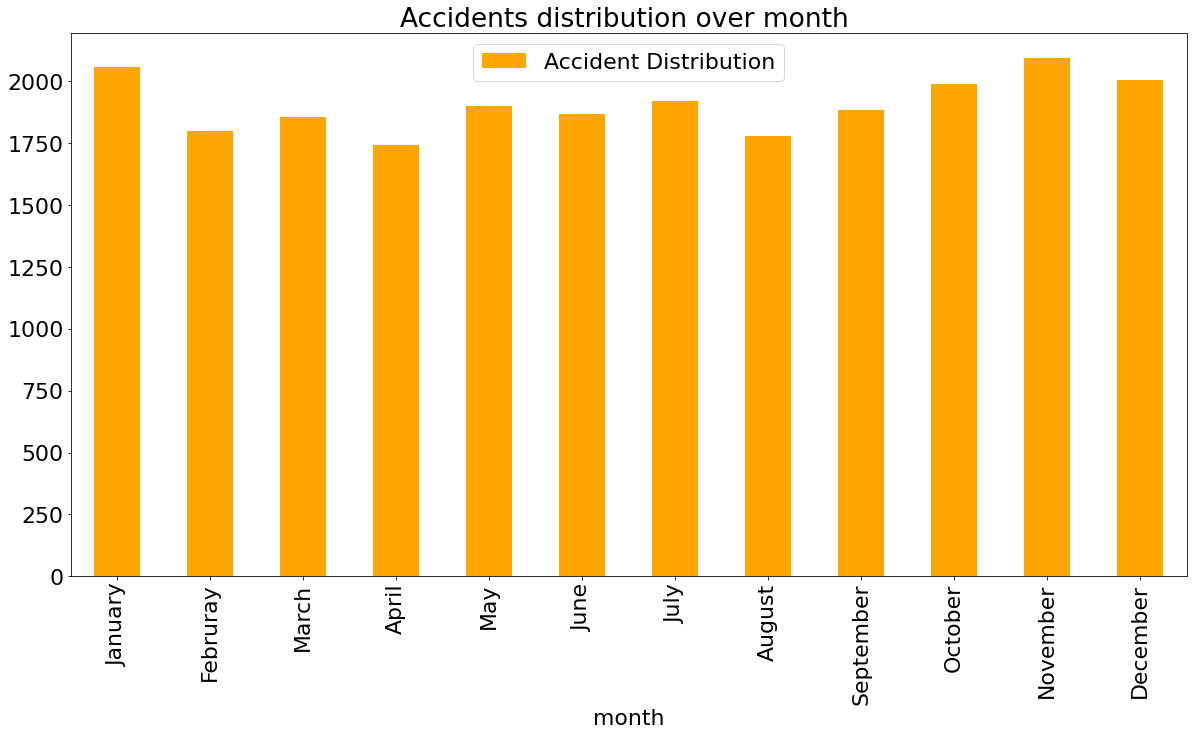

In [285]:
ax=result23.plot.bar('month','Accident Distribution', rot=90,title="Accidents distribution over month ",figsize=(20, 10),color="Orange")

In [507]:
A2018

DataFrame[accident_index: string, accident_year: string, accident_reference: string, location_easting_osgr: string, location_northing_osgr: string, longitude: string, latitude: string, police_force: string, accident_severity: string, number_of_vehicles: string, number_of_casualties: string, date: string, day_of_week: string, time: string, local_authority_district: string, local_authority_ons_district: string, local_authority_highway: string, first_road_class: string, first_road_number: string, road_type: string, speed_limit: string, junction_detail: string, junction_control: string, second_road_class: string, second_road_number: string, pedestrian_crossing_human_control: string, pedestrian_crossing_physical_facilities: string, light_conditions: string, weather_conditions: string, road_surface_conditions: string, special_conditions_at_site: string, carriageway_hazards: string, urban_or_rural_area: string, did_police_officer_attend_scene_of_accident: string, trunk_road_flag: string, lsoa

In [5]:
A2018

DataFrame[accident_index: string, accident_year: string, accident_reference: string, location_easting_osgr: string, location_northing_osgr: string, longitude: string, latitude: string, police_force: string, accident_severity: string, number_of_vehicles: string, number_of_casualties: string, date: string, day_of_week: string, time: string, local_authority_district: string, local_authority_ons_district: string, local_authority_highway: string, first_road_class: string, first_road_number: string, road_type: string, speed_limit: string, junction_detail: string, junction_control: string, second_road_class: string, second_road_number: string, pedestrian_crossing_human_control: string, pedestrian_crossing_physical_facilities: string, light_conditions: string, weather_conditions: string, road_surface_conditions: string, special_conditions_at_site: string, carriageway_hazards: string, urban_or_rural_area: string, did_police_officer_attend_scene_of_accident: string, trunk_road_flag: string, lsoa

In [662]:
A2018ts_df = TimeAccident_dfmonthly_new.groupby("accident_severity",'road_type').agg(F.count(TimeAccident_dfmonthly_new.accident_index).alias('Total accidents'))
A2018ts_df.show()

+-----------------+---------+---------------+
|accident_severity|road_type|Total accidents|
+-----------------+---------+---------------+
|                3|       -1|              1|
|                1|        1|            471|
|                2|        3|          44030|
|                3|        3|         291457|
|                2|        2|           6566|
|                1|        2|            328|
|                2|        6|         262089|
|                3|        1|         136135|
|                1|        3|           5983|
|                3|        2|          42394|
|                3|        6|        1416841|
|                1|        7|            205|
|                2|        1|          14601|
|                1|        6|          22595|
|                3|        9|          16857|
|                2|        7|           2489|
|                1|        9|            116|
|                3|        7|          22311|
|                2|        9|     

In [7]:
A2018ts_df = A2018.groupby("accident_severity",'road_type').agg(F.count(A2018.accident_index).alias('Total accidents'))
A2018ts_df.show()

+-----------------+---------+---------------+
|accident_severity|road_type|Total accidents|
+-----------------+---------+---------------+
|                3|       -1|              1|
|                1|        1|            471|
|                2|        3|          44030|
|                3|        3|         291457|
|                2|        2|           6566|
|                1|        2|            328|
|                2|        6|         262089|
|                3|        1|         136135|
|                1|        3|           5983|
|                3|        2|          42394|
|                3|        6|        1416841|
|                1|        7|            205|
|                2|        1|          14601|
|                1|        6|          22595|
|                3|        9|          16857|
|                2|        7|           2489|
|                1|        9|            116|
|                3|        7|          22311|
|                2|        9|     

In [8]:
A2018_df=A2018ts_df.toPandas()

In [9]:
A2018_df

accident_severity road_type  Total accidents
0                  3        -1                1
1                  1         1              471
2                  2         3            44030
3                  3         3           291457
4                  2         2             6566
5                  1         2              328
6                  2         6           262089
7                  3         1           136135
8                  1         3             5983
9                  3         2            42394
10                 3         6          1416841
11                 1         7              205
12                 2         1            14601
13                 1         6            22595
14                 3         9            16857
15                 2         7             2489
16                 1         9              116
17                 3         7            22311
18                 2         9             1958

In [24]:
from scipy.stats import spearmanr

In [15]:

A2018_df['accident_severity'] =  A2018_df['accident_severity'].astype(int)
type(A2018_df['accident_severity'][0])

numpy.int64

In [ ]:
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

In [32]:
from scipy.stats import pearsonr
from scipy.stats import kendalltau
data1 = A2018_df['accident_severity']
data2 = A2018_df['Total accidents']
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.607, p=0.002
Probably dependent


In [18]:
A2018_df=A2018_df[A2018_df.road_type != "-1"]
A2018_df

accident_severity road_type  Total accidents
1                   1         1              471
2                   2         3            44030
3                   3         3           291457
4                   2         2             6566
5                   1         2              328
6                   2         6           262089
7                   3         1           136135
8                   1         3             5983
9                   3         2            42394
10                  3         6          1416841
11                  1         7              205
12                  2         1            14601
13                  1         6            22595
14                  3         9            16857
15                  2         7             2489
16                  1         9              116
17                  3         7            22311
18                  2         9             1958

In [ ]:
df.dropna()

In [27]:
A2018_dfpiv=A2018_df.pivot(index ='road_type', columns ='accident_severity')
A2018_dfpiv

Total accidents                 
accident_severity               1       2        3
road_type                                         
1                             471   14601   136135
2                             328    6566    42394
3                            5983   44030   291457
6                           22595  262089  1416841
7                             205    2489    22311
9                             116    1958    16857

In [28]:
A2018_dfpiv=A2018_dfpiv.dropna()



In [29]:
A2018_dfpiv=A2018_dfpiv.dropna()

dataset_table=A2018_dfpiv
 
dataset_table.values 
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)
import scipy.stats
b=scipy.stats.chi2_contingency(dataset_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
#Degree of Freedom
no_of_rows=len(dataset_table.iloc[0:6,0])
no_of_columns=len(dataset_table.iloc[0,0:3])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)



Observed Values :-
 [[    471   14601  136135]
 [    328    6566   42394]
 [   5983   44030  291457]
 [  22595  262089 1416841]
 [    205    2489   22311]
 [    116    1958   16857]]
Expected Values :-
 [[1.96314350e+03 2.19287320e+04 1.27315124e+05]
 [6.39913608e+02 7.14797161e+03 4.15001148e+04]
 [4.43335700e+03 4.95215441e+04 2.87515099e+05]
 [2.20911581e+04 2.46762952e+05 1.43267089e+06]
 [3.24643722e+02 3.62633968e+03 2.10540166e+04]
 [2.45784055e+02 2.74546037e+03 1.59397556e+04]]
Degree of Freedom:- 10


# The method for measuring Chi-Square value for the selected factors

In [22]:
r=[]
for o,e in zip(Observed_Values,Expected_Values):
    a=(o-e)**2./e
    
    r.append(a[0]+a[1]+a[2])
print("r",r)
chi_square_statistic=0
for i in range(len(r)):
    chi_square_statistic+=r[i]
print("chi-square statistic:-",chi_square_statistic)
alpha = 0.05
from scipy.stats import chi2
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print("p-value",p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    

r [4193.795574610202, 218.67280881776227, 1204.6776335388686, 1138.2752182581148, 475.84594970392686, 347.1751350618879]
chi-square statistic:- 7578.4423199907615
critical_value: 18.307038053275146
p-value 0.0
Significance level:  0.05
Degree of Freedom:  10
Reject H0,There is a relationship between 2 categorical variables


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


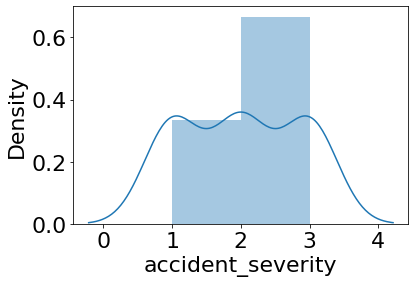

<Figure size 432x288 with 0 Axes>

In [624]:
sns.distplot(A2018_df['accident_severity']);
fig = plt.figure()


<AxesSubplot:>

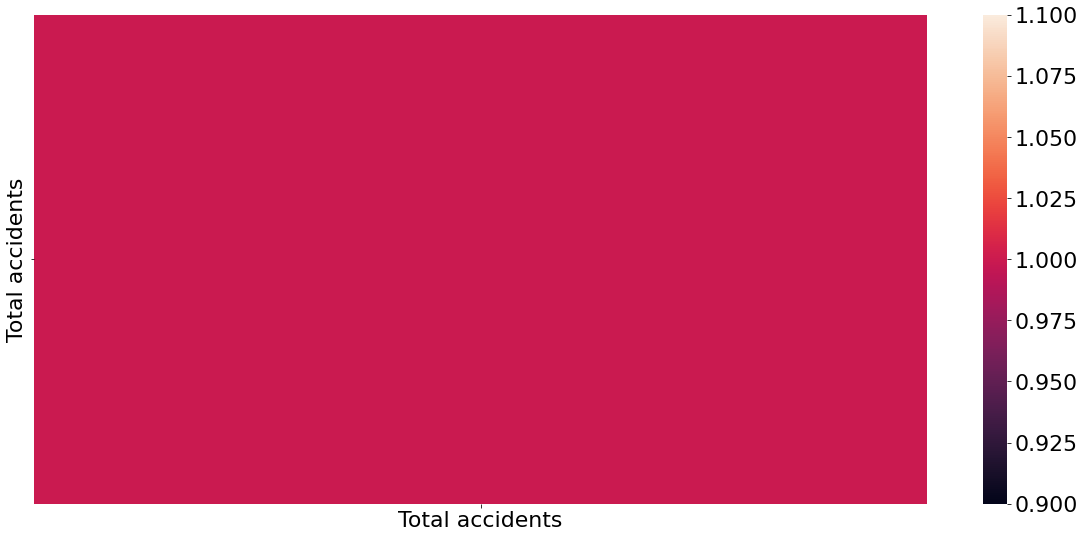

In [511]:
corr =  A2018_df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [5]:
from pyspark.sql.functions import concat, col, lit


V20052014 = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/dft-road-casualty-statistics-vehicle-1979-2021.csv')
V20052014=V20052014.filter(V20052014.accident_year>2004)
V20052014=V20052014.filter(V20052014.accident_year<2020)
V20052014.show()



+--------------+-------------+------------------+-----------------+------------+-----------------------+-----------------+----------------------+--------------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+---------------------+-----------------------+-------------------------+-------------+-------------+------------------+------------------+---------------+--------------+------------------+-----------------+---------------------+--------------+
|accident_index|accident_year|accident_reference|vehicle_reference|vehicle_type|towing_and_articulation|vehicle_manoeuvre|vehicle_direction_from|vehicle_direction_to|vehicle_location_restricted_lane|junction_location|skidding_and_overturning|hit_object_in_carriageway|vehicle_leaving_carriageway|hit_object_off_carriageway|first_point_of_impact|vehicle_left_hand_drive|journey_purpose_of_driver|sex_of_driver|age_of_driver|age_band_o

In [6]:
from pyspark.sql.functions import col, when
valueWhenTrue1 ="Pedal cycle"
valueWhenTrue2 ="Motorcycle"
valueWhenTrue3 = "Motorcycle"
valueWhenTrue4 = "Motorcycle"
valueWhenTrue5 = "Motorcycle"
valueWhenTrue8 = "Car"
valueWhenTrue9 ="Car"
valueWhenTrue10 ="Bus"
valueWhenTrue11 ="Bus"
valueWhenTrue16 ="Ridden horse"
valueWhenTrue17 ="Agricultural vehicle"
valueWhenTrue18 ="Bus"
valueWhenTrue19 ="Goods"
valueWhenTrue20 ="Goods"
valueWhenTrue21 ="Goods"
valueWhenTrue22 ="Motorcycle"
valueWhenTrue23 ="Motorcycle"
valueWhenTrue90 ="Other vehicle"
valueWhenTrue97 ="Motorcycle"
valueWhenTrue98 ="Goods"
valueWhenTrueo1 ="Data missing or out of range"
#C2017 = C2017df.withColumn("Vehicle_Type", when(df.gender == "M","Male")
#                                 .when(df.gender == "F","Female")
#                                 .when(df.gender.isNull() ,"")
#                                 .otherwise(df.gender))
V20052014=V20052014.withColumn(
    "vehicle_type",
    when(
        col("vehicle_type") == 1,
        "Pedal cycle"
    ).
    when(
        col("vehicle_type") == 2,
        valueWhenTrue2
    ).
    when(
        col("vehicle_type") == 3,
        valueWhenTrue3
    ).
    when(
        col("vehicle_type") == 4,
        valueWhenTrue4
    ).
    when(
        col("vehicle_type") == 5,
        valueWhenTrue5
    ).
    when(
        col("vehicle_type") == 8,
        valueWhenTrue8
    ).
    when(
        col("vehicle_type") == 9,
        valueWhenTrue9
    ).
    when(
        col("vehicle_type") == 10,
        valueWhenTrue10
    ).
    when(
        col("vehicle_type") == 11,
        valueWhenTrue11
    ).
    when(
        col("vehicle_type") == 16,
        valueWhenTrue16
    ).
    when(
        col("vehicle_type") == 17,
        valueWhenTrue17
    ).
    when(
        col("vehicle_type") == 18,
        valueWhenTrue18
    ).
    when(
        col("vehicle_type") == 19,
        valueWhenTrue19
    ).
    when(
        col("vehicle_type") == 20,
        valueWhenTrue20
    ).
    when(
        col("vehicle_type") == 21,
        valueWhenTrue21
    ).
    when(
        col("vehicle_type") == 22,
        valueWhenTrue22
    ).
    when(
        col("vehicle_type") == 23,
        valueWhenTrue23
    ).
    when(
        col("vehicle_type") == 90,
        valueWhenTrue90
    ).
    when(
        col("vehicle_type") == 97,
        valueWhenTrue97
    ).
    when(
        col("vehicle_type") == 98,
        valueWhenTrue98
    ).
    when(
        col("vehicle_type") == -1,
        valueWhenTrueo1
    ).otherwise(col("vehicle_type"))
)


In [8]:
accidentindex=A2018.select('accident_index','accident_severity')
accidentindex.show()

+--------------+-----------------+
|accident_index|accident_severity|
+--------------+-----------------+
| 200501BS00001|                2|
| 200501BS00002|                3|
| 200501BS00003|                3|
| 200501BS00004|                3|
| 200501BS00005|                3|
| 200501BS00006|                3|
| 200501BS00007|                3|
| 200501BS00009|                3|
| 200501BS00010|                3|
| 200501BS00011|                3|
| 200501BS00012|                3|
| 200501BS00014|                3|
| 200501BS00015|                3|
| 200501BS00016|                3|
| 200501BS00017|                3|
| 200501BS00018|                3|
| 200501BS00019|                2|
| 200501BS00020|                3|
| 200501BS00021|                3|
| 200501BS00022|                2|
+--------------+-----------------+
only showing top 20 rows



In [24]:
V20052014vech_dff=V20052014vech_dff.withColumn(
    "age_band_of_driver",
    when(
        col("age_band_of_driver") == 1,
        "Upto 20Y"
    ).
    when(
        col("age_band_of_driver") == 2,
        "Upto 20Y"
    ).
    when(
        col("age_band_of_driver") == 3,
        "Upto 20Y"
    ).
    when(
        col("age_band_of_driver") == 4,
        "Upto 20Y"
    ).
    when(
        col("age_band_of_driver") == 5,
        "20Y to 40Y"
    ).
    when(
        col("age_band_of_driver") == 6,
        "20Y to 40Y"
    ).
    when(
        col("age_band_of_driver") == 7,
        "20Y to 40Y"
    ).when(
        col("age_band_of_driver") == 8,
        "40Y to 70Y"
    ).when(
        col("age_band_of_driver") == 9,
        "40Y to 70Y"
    ).when(
        col("age_band_of_driver") == 10,
        "40Y to 70Y"
    ).when(
        col("age_band_of_driver") == 11,
        "Over 70"
    ).when(
        col("age_band_of_driver") == -1,
        "Data missing or out of range"
    ).otherwise(col("age_band_of_driver")),
)


In [9]:
V20052014vech_dff = V20052014.join(accidentindex, on=['Accident_Index'])

V20052014vech_dff.show()

+--------------+-------------+------------------+-----------------+------------+-----------------------+-----------------+----------------------+--------------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+---------------------+-----------------------+-------------------------+-------------+-------------+------------------+------------------+---------------+--------------+------------------+-----------------+---------------------+--------------+-----------------+
|accident_index|accident_year|accident_reference|vehicle_reference|vehicle_type|towing_and_articulation|vehicle_manoeuvre|vehicle_direction_from|vehicle_direction_to|vehicle_location_restricted_lane|junction_location|skidding_and_overturning|hit_object_in_carriageway|vehicle_leaving_carriageway|hit_object_off_carriageway|first_point_of_impact|vehicle_left_hand_drive|journey_purpose_of_driver|sex_of_driver|age_of

In [25]:
Age_df = V20052014vech_dff.groupby('age_band_of_driver','accident_severity').agg(F.count(V20052014vech_dff.accident_index).alias('Total accidents')).sort("Total accidents")
Age_df.show()

+--------------------+-----------------+---------------+
|  age_band_of_driver|accident_severity|Total accidents|
+--------------------+-----------------+---------------+
|Data missing or o...|                1|           2463|
|             Over 70|                1|           2525|
|            Upto 20Y|                1|           4731|
|             Over 70|                2|          17507|
|          40Y to 70Y|                1|          17654|
|          20Y to 40Y|                1|          25536|
|Data missing or o...|                2|          48337|
|            Upto 20Y|                2|          60174|
|             Over 70|                3|          76450|
|          40Y to 70Y|                2|         166391|
|          20Y to 40Y|                2|         270225|
|            Upto 20Y|                3|         351830|
|Data missing or o...|                3|         425600|
|          40Y to 70Y|                3|         931310|
|          20Y to 40Y|         

In [26]:

Age_df_df=Age_df.toPandas()

In [27]:
Age_df_df=Age_df_df.dropna()
A2018_dfpiv=Age_df_df.pivot(index ='age_band_of_driver', columns ='accident_severity')
A2018_dfpiv

Total accidents                 
accident_severity                          1       2        3
age_band_of_driver                                           
20Y to 40Y                             25536  270225  1795753
40Y to 70Y                             17654  166391   931310
Data missing or out of range            2463   48337   425600
Over 70                                 2525   17507    76450
Upto 20Y                                4731   60174   351830

In [40]:
import seaborn as sns
dataset=sns.load_dataset('tips')
dataset_table=pd.crosstab(dataset['sex'],dataset['size'])
print(dataset_table)

size    1   2   3   4  5  6
sex                        
Male    1  98  24  28  4  2
Female  3  58  14   9  1  2


In [9]:
import pandas as pd
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
accidents = pd.read_csv ('/Users/Asfandyar/Downloads/dft-road-casualty-statistics-accident-1979-2020.csv')
accidents

accident_index  accident_year accident_reference  \
0        197901A11AD14           1979          01A11AD14   
1        197901A1BAW34           1979          01A1BAW34   
2        197901A1BFD77           1979          01A1BFD77   
3        197901A1BGC20           1979          01A1BGC20   
4        197901A1BGF95           1979          01A1BGF95   
...                ...            ...                ...   
8602819  2020991027064           2020          991027064   
8602820  2020991029573           2020          991029573   
8602821  2020991030297           2020          991030297   
8602822  2020991030900           2020          991030900   
8602823  2020991032575           2020          991032575   

         location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                          NaN                     NaN        NaN        NaN   
1                     198460.0                894000.0        NaN        NaN   
2                     406380.0                307000.0        NaN        NaN   
3                     281680.0                440000.0        NaN        NaN   
4                     153960.0                795000.0        NaN        NaN   
...                        ...                     ...        ...        ...   
8602819               343034.0                731654.0  -2.926320  56.473539   
8602820               257963.0                658891.0  -4.267565  55.802353   
8602821               383664.0                810646.0  -2.271903  57.186317   
8602822               277161.0                674852.0  -3.968753  55.950940   
8602823               240402.0                681950.0  -4.561040  56.003843   

         police_force  accident_severity  number_of_vehicles  ...  \
0                   1                  3                   2  ...   
1                   1                  3                   1  ...   
2                   1                  3                   2  ...   
3                   1                  3                   2  ...   
4                   1                  2                   2  ...   
...               ...                ...                 ...  ...   
8602819            99                  2                   2  ...   
8602820            99                  3                   1  ...   
8602821            99                  2                   2  ...   
8602822            99                  3                   2  ...   
8602823            99                  3                   1  ...   

         pedestrian_crossing_physical_facilities light_conditions  \
0                                             -1                1   
1                                             -1                4   
2                                             -1                4   
3                                             -1                4   
4                                             -1                4   
...                                          ...              ...   
8602819                                        0                1   
8602820                                        0                1   
8602821                                        0                1   
8602822                                        0                1   
8602823                                        0                1   

         weather_conditions road_surface_conditions  \
0                         8                       1   
1                         8                       3   
2                         8                       3   
3                         8                       3   
4                         3                       3   
...                     ...                     ...   
8602819                   1                       1   
8602820                   1                       1   
8602821                   1                       1   
8602822                   1                       1   
8602823                   1                       1   

       

In [10]:
accidents
mask = (accidents['accident_year'] > 2004) & (accidents['accident_year'] <= 2019)
mask

0          False
1          False
2          False
3          False
4          False
           ...  
8602819    False
8602820    False
8602821    False
8602822    False
8602823    False
Name: accident_year, Length: 8602824, dtype: bool

In [11]:
Acc=accidents.loc[mask]

In [253]:
AccRT = Acc[['accident_severity', 'first_road_class']][:10000]
AccRT = AccRT.reset_index(drop=True)
AccRT

accident_severity  first_road_class
0                     2                 3
1                     3                 4
2                     3                 5
3                     3                 3
4                     3                 6
...                 ...               ...
9995                  3                 3
9996                  3                 3
9997                  3                 3
9998                  2                 3
9999                  3                 3

[10000 rows x 2 columns]

# Anova Test


In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(12)
AccRT = Acc[['accident_severity', 'first_road_class']][:20000]
AccRT = AccRT.reset_index(drop=True)
#AccRT
AccRT['accident_severity']=AccRT['accident_severity'].replace({1: 'Fatal', 2: 'Serious', 3: 'Slight'})
#AccRT


# Group age data by race
severity_frame = pd.DataFrame({"severity":AccRT['accident_severity'],"first_road_class":AccRT['first_road_class']})
groups = severity_frame.groupby("severity").groups

# Etract individual groups
Fatal = AccRT['first_road_class'].to_numpy()[groups["Fatal"]]
Serious = AccRT['first_road_class'].to_numpy()[groups["Serious"]]
Slight = AccRT['first_road_class'].to_numpy()[groups["Slight"]]


# Perform the ANOVA
print('severity~first_road_class')
print(stats.f_oneway(Fatal,Serious,Slight))
AccRT = Acc[['accident_severity', 'first_road_class']][:20000]
AccRT = AccRT.reset_index(drop=True)
from statsmodels.formula.api import ols
import statsmodels.api as sm
severity_frame = pd.DataFrame({"severity":AccRT['accident_severity'],"first_road_class":AccRT['first_road_class']})
severity_frame
model = ols('severity~first_road_class',                # Model formula
            data = severity_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)



severity~first_road_class
F_onewayResult(statistic=3.291830175326872, pvalue=0.0372058822331273)
                       sum_sq       df         F    PR(>F)
first_road_class     0.667436      1.0  4.602263  0.031942
Residual          2900.179764  19998.0       NaN       NaN


In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(12)
AccRT = Acc[['accident_severity', 'road_type']][:20000]
AccRT = AccRT.reset_index(drop=True)
#AccRT
AccRT['accident_severity']=AccRT['accident_severity'].replace({1: 'Fatal', 2: 'Serious', 3: 'Slight'})
#AccRT


# Group age data by race
severity_frame = pd.DataFrame({"severity":AccRT['accident_severity'],"road_type":AccRT['road_type']})
groups = severity_frame.groupby("severity").groups

# Etract individual groups
Fatal = AccRT['road_type'].to_numpy()[groups["Fatal"]]
Serious = AccRT['road_type'].to_numpy()[groups["Serious"]]
Slight = AccRT['road_type'].to_numpy()[groups["Slight"]]


# Perform the ANOVA
print('severity~road_type')
print(stats.f_oneway(Fatal,Serious,Slight))
AccRT = Acc[['accident_severity', 'road_type']][:20000]
AccRT = AccRT.reset_index(drop=True)
from statsmodels.formula.api import ols
import statsmodels.api as sm
severity_frame = pd.DataFrame({"severity":AccRT['accident_severity'],"road_type":AccRT['road_type']})
severity_frame
model = ols('severity~road_type',                # Model formula
            data = severity_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)



severity~road_type
F_onewayResult(statistic=0.5792752078545762, pvalue=0.5603137255090602)
                sum_sq       df         F    PR(>F)
road_type     0.121945      1.0  0.840706  0.359206
Residual   2900.725255  19998.0       NaN       NaN


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(12)
AccRT = Acc[['accident_severity', 'junction_detail']][:20000]
AccRT = AccRT.reset_index(drop=True)
#AccRT
AccRT['accident_severity']=AccRT['accident_severity'].replace({1: 'Fatal', 2: 'Serious', 3: 'Slight'})



AccRT = Acc[['accident_severity', 'junction_detail']][:20000]
AccRT = AccRT.reset_index(drop=True)
from statsmodels.formula.api import ols
import statsmodels.api as sm
severity_frame = pd.DataFrame({"severity":AccRT['accident_severity'],"junction_detail":AccRT['junction_detail']})
severity_frame
model = ols('severity~junction_detail',                # Model formula
            data = severity_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)


                      sum_sq       df         F    PR(>F)
junction_detail     3.204045      1.0  22.11262  0.000003
Residual         2897.643155  19998.0       NaN       NaN


In [63]:
Acc['junction_control']

0         -1
1          2
2         -1
3         -1
4         -1
          ..
2287422   -1
2287423   -1
2287424    4
2287425    4
2287426   -1
Name: junction_control, Length: 2287427, dtype: int64

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(12)



# Group age data by 
AccRT = Acc[['accident_severity', 'junction_control']]
AccRT = AccRT.reset_index(drop=True)
from statsmodels.formula.api import ols
import statsmodels.api as sm
severity_frame = pd.DataFrame({"severity":AccRT['accident_severity'],"junction_control":AccRT['junction_control']})
severity_frame
model = ols('severity~junction_control',                # Model formula
            data = severity_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)


                         sum_sq         df             F  PR(>F)
junction_control    1756.967410        1.0  10523.832139     0.0
Residual          381888.567304  2287425.0           NaN     NaN


In [71]:
print(Acc.columns.tolist())

['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(12)



# Group age data by 
AccRT = Acc[['accident_severity', 'day_of_week']]
AccRT = AccRT.reset_index(drop=True)
from statsmodels.formula.api import ols
import statsmodels.api as sm
severity_frame = pd.DataFrame({"severity":AccRT['accident_severity'],"day_of_week":AccRT['day_of_week']})
severity_frame
model = ols('severity~day_of_week',                # Model formula
            data = severity_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                    sum_sq         df          F        PR(>F)
day_of_week       4.208090        1.0  25.090335  5.471043e-07
Residual     383641.326624  2287425.0        NaN           NaN


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(12)



# Group age data by 
AccRT = Acc[['accident_severity', 'light_conditions']]
AccRT = AccRT.reset_index(drop=True)
from statsmodels.formula.api import ols
import statsmodels.api as sm
severity_frame = pd.DataFrame({"severity":AccRT['accident_severity'],"light_conditions":AccRT['light_conditions']})
severity_frame
model = ols('severity~light_conditions',                # Model formula
            data = severity_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                         sum_sq         df            F  PR(>F)
light_conditions    1403.800907        1.0  8400.676862     0.0
Residual          382241.733807  2287425.0          NaN     NaN


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(12)



# Group age data by 
AccRT = Acc[['accident_severity', 'weather_conditions']]
AccRT = AccRT.reset_index(drop=True)
from statsmodels.formula.api import ols
import statsmodels.api as sm
severity_frame = pd.DataFrame({"severity":AccRT['accident_severity'],"weather_conditions":AccRT['weather_conditions']})
severity_frame
model = ols('severity~weather_conditions',                # Model formula
            data = severity_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                           sum_sq         df            F         PR(>F)
weather_conditions     190.013728        1.0  1133.487794  2.002963e-248
Residual            383455.520986  2287425.0          NaN            NaN


In [6]:
import pandas as pd
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns
vechilee = pd.read_csv ('/Users/Asfandyar/Downloads/archive/Vehicle_Information.csv',encoding= 'unicode_escape')


In [13]:
Acc

accident_index  accident_year accident_reference  \
6224198  200501BS00001           2005          01BS00001   
6224199  200501BS00002           2005          01BS00002   
6224200  200501BS00003           2005          01BS00003   
6224201  200501BS00004           2005          01BS00004   
6224202  200501BS00005           2005          01BS00005   
...                ...            ...                ...   
8511620  2019984106919           2019          984106919   
8511621  2019984107019           2019          984107019   
8511622  2019984107219           2019          984107219   
8511623  2019984107419           2019          984107419   
8511624  201998QC01004           2019          98QC01004   

         location_easting_osgr  location_northing_osgr  longitude   latitude  \
6224198               525680.0                178240.0  -0.191170  51.489096   
6224199               524170.0                181650.0  -0.211708  51.520075   
6224200               524520.0                182240.0  -0.206458  51.525301   
6224201               526900.0                177530.0  -0.173862  51.482442   
6224202               528060.0                179040.0  -0.156618  51.495752   
...                        ...                     ...        ...        ...   
8511620               312635.0                573392.0  -3.368899  55.047323   
8511621               337522.0                591682.0  -2.983499  55.215407   
8511622               318544.0                567087.0  -3.274645  54.991685   
8511623               336525.0                584226.0  -2.997491  55.148292   
8511624               291367.0                608364.0  -3.715064  55.357237   

         police_force  accident_severity  number_of_vehicles  ...  \
6224198             1                  2                   1  ...   
6224199             1                  3                   1  ...   
6224200             1                  3                   2  ...   
6224201             1                  3                   1  ...   
6224202             1                  3                   1  ...   
...               ...                ...                 ...  ...   
8511620            98                  3                   1  ...   
8511621            98                  3                   4  ...   
8511622            98                  3                   2  ...   
8511623            98                  3                   1  ...   
8511624            98                  2                   1  ...   

         pedestrian_crossing_physical_facilities light_conditions  \
6224198                                        1                1   
6224199                                        5                4   
6224200                                        0                4   
6224201                                        0                1   
6224202                                        0                7   
...                                          ...              ...   
8511620                                        0                1   
8511621                                        0                1   
8511622                                        0                1   
8511623                                        0                1   
8511624                                        0                1   

         weather_conditions road_surface_conditions  \
6224198                   2                       2   
6224199                   1                       1   
6224200                   1                       1   
6224201                   1                       1   
6224202                   1                       2   
...                     ...                     ...   
8511620                   1                       2   
8511621                   1                       2   
8511622                   1                       1   
8511623                   1                       1   
8511624                   1                       1   

       

In [19]:
vechilee = vechilee.rename({'Accident_Index': 'accident_index'}, axis=1)
Acc = Acc.rename({'accident_index': 'accident_index'}, axis=1)

In [31]:

mask = (vechilee['Year'] > 2004)
vechilee=vechilee.loc[mask]

In [57]:
Acc['day_of_week']

0          3
1          4
2          5
3          6
4          2
          ..
2287422    7
2287423    5
2287424    6
2287425    7
2287426    1
Name: day_of_week, Length: 2287427, dtype: int64

In [23]:
Acc = Acc.reset_index(drop=True)
Acc
Acc

accident_index  accident_year accident_reference  \
0        200501BS00001           2005          01BS00001   
1        200501BS00002           2005          01BS00002   
2        200501BS00003           2005          01BS00003   
3        200501BS00004           2005          01BS00004   
4        200501BS00005           2005          01BS00005   
...                ...            ...                ...   
2287422  2019984106919           2019          984106919   
2287423  2019984107019           2019          984107019   
2287424  2019984107219           2019          984107219   
2287425  2019984107419           2019          984107419   
2287426  201998QC01004           2019          98QC01004   

         location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                     525680.0                178240.0  -0.191170  51.489096   
1                     524170.0                181650.0  -0.211708  51.520075   
2                     524520.0                182240.0  -0.206458  51.525301   
3                     526900.0                177530.0  -0.173862  51.482442   
4                     528060.0                179040.0  -0.156618  51.495752   
...                        ...                     ...        ...        ...   
2287422               312635.0                573392.0  -3.368899  55.047323   
2287423               337522.0                591682.0  -2.983499  55.215407   
2287424               318544.0                567087.0  -3.274645  54.991685   
2287425               336525.0                584226.0  -2.997491  55.148292   
2287426               291367.0                608364.0  -3.715064  55.357237   

         police_force  accident_severity  number_of_vehicles  ...  \
0                   1                  2                   1  ...   
1                   1                  3                   1  ...   
2                   1                  3                   2  ...   
3                   1                  3                   1  ...   
4                   1                  3                   1  ...   
...               ...                ...                 ...  ...   
2287422            98                  3                   1  ...   
2287423            98                  3                   4  ...   
2287424            98                  3                   2  ...   
2287425            98                  3                   1  ...   
2287426            98                  2                   1  ...   

         pedestrian_crossing_physical_facilities light_conditions  \
0                                              1                1   
1                                              5                4   
2                                              0                4   
3                                              0                1   
4                                              0                7   
...                                          ...              ...   
2287422                                        0                1   
2287423                                        0                1   
2287424                                        0                1   
2287425                                        0                1   
2287426                                        0                1   

         weather_conditions road_surface_conditions  \
0                         2                       2   
1                         1                       1   
2                         1                       1   
3                         1                       1   
4                         1                       2   
...                     ...                     ...   
2287422                   1                       2   
2287423                   1                       2   
2287424                   1                       1   
2287425                   1                       1   
2287426                   1                       1   

       

In [37]:
vech23= pd.merge(vechilee,Acc[['accident_index','accident_severity']],on='accident_index')

vech23

accident_index Age_Band_of_Driver  Age_of_Vehicle  \
0        200501BS00002            36 - 45             3.0   
1        200501BS00003            26 - 35             5.0   
2        200501BS00004            46 - 55             4.0   
3        200501BS00005            46 - 55            10.0   
4        200501BS00006            46 - 55             1.0   
...                ...                ...             ...   
2027639  2016984131116            21 - 25            14.0   
2027640  2016984131116            56 - 65             NaN   
2027641  2016984131216            56 - 65             NaN   
2027642  2016984131316            16 - 20            13.0   
2027643  2016984133416            46 - 55             5.0   

                Driver_Home_Area_Type  Driver_IMD_Decile  \
0        Data missing or out of range                NaN   
1                          Urban area                3.0   
2                          Urban area                1.0   
3        Data missing or out of range                NaN   
4                          Urban area                4.0   
...                               ...                ...   
2027639                    Urban area                NaN   
2027640                    Small town                NaN   
2027641                    Urban area                3.0   
2027642                    Urban area                6.0   
2027643                    Urban area                NaN   

         Engine_Capacity_.CC. Hit_Object_in_Carriageway  \
0                      8268.0                      None   
1                      8300.0            Parked vehicle   
2                      1769.0                      None   
3                        85.0                      Kerb   
4                      2976.0                      None   
...                       ...                       ...   
2027639                1598.0                      None   
2027640                1598.0                      None   
2027641                   NaN                      None   
2027642                1796.0                      None   
2027643                2184.0                      None   

        Hit_Object_off_Carriageway  Journey_Purpose_of_Driver  \
0                             None    Journey as part of work   
1                             None    Journey as part of work   
2                             None  Other/Not known (2005-10)   
3                             None  Other/Not known (2005-10)   
4                             None  Other/Not known (2005-10)   
...                            ...                        ...   
2027639                       None                  Not known   
2027640                       None     Commuting to/from work   
2027641      Central crash barrier    Journey as part of work   
2027642                       Tree                  Not known   
2027643              Wall or fence                  Not known   

                                    Junction_Location  ...  \
0                                  Leaving roundabout  ...   
1              Not at or within 20 metres of junction  ...   
2              Not at or within 20 metres of junction  ...   
3              Not at or within 20 metres of junction  ...   
4              Not at or within 20 metres of junction  ...   
...                                               ...  ...   
2027639  Mid Junction - on roundabout or on main road  ...   
2027640  Mid Junction - on roundabout or on main road  ...   
2027641        Not at or within 20 metres of junction  ...   
2027642        Not at or within 20 metres of junction  ...   
2027643        Not at or within 20 metres of junction  ...   

        Towing_and_Articulation        Vehicle_Leaving_Carriageway  \
0           No tow/articulation          Did not leave carriageway   
1           No tow/articulation          Did not leave carriageway   
2           No tow/articulation          Did not leave carriageway   
3           No tow/articulation        

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(12)
vech2= vech23[['accident_severity', 'Vehicle_Type']]
vech2 = vech2.reset_index(drop=True)
vech2["Vehicle_Type"] = vech2["Vehicle_Type"].astype('category')
vech2["Vehicle_Type"] = vech2["Vehicle_Type"].cat.codes
vech2 = vech2.dropna()
vech2
vech2 = vech2[['accident_severity', 'Vehicle_Type']]
vech2 = vech2.reset_index(drop=True)
#AccRT
#vech2['accident_severity']=vech2['accident_severity'].replace({1: 'Fatal', 2: 'Serious', 3: 'Slight'})
#AccRT


# Group age data by ra


vech2 = vech2[['accident_severity', 'Vehicle_Type']][:20000]
vech2 = vech2.reset_index(drop=True)
from statsmodels.formula.api import ols
import statsmodels.api as sm
severity_frame = pd.DataFrame({"severity":vech2['accident_severity'],"Vehicle_Type":vech2['Vehicle_Type']})
severity_frame
model = ols('severity~Vehicle_Type',                # Model formula
            data = severity_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)



                   sum_sq       df          F        PR(>F)
Vehicle_Type     7.737798      1.0  56.955431  4.648715e-14
Residual      2716.869752  19998.0        NaN           NaN


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(12)
vech2= vech23[['accident_severity', 'Sex_of_Driver']]
vech2 = vech2.reset_index(drop=True)
vech2["Sex_of_Driver"] = vech2["Sex_of_Driver"].astype('category')
vech2["Sex_of_Driver"] = vech2["Sex_of_Driver"].cat.codes
vech2 = vech2.dropna()
vech2
vech2 = vech2[['accident_severity', 'Sex_of_Driver']]
vech2 = vech2.reset_index(drop=True)
#AccRT
#vech2['accident_severity']=vech2['accident_severity'].replace({1: 'Fatal', 2: 'Serious', 3: 'Slight'})
#AccRT


# Group age data by ra


vech2 = vech2[['accident_severity', 'Sex_of_Driver']][:20000]
vech2 = vech2.reset_index(drop=True)
from statsmodels.formula.api import ols
import statsmodels.api as sm
severity_frame = pd.DataFrame({"severity":vech2['accident_severity'],"Sex_of_Driver":vech2['Sex_of_Driver']})
severity_frame
model = ols('severity~Sex_of_Driver',                # Model formula
            data = severity_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)



                    sum_sq       df          F        PR(>F)
Sex_of_Driver     3.528091      1.0  25.928964  3.574295e-07
Residual       2721.079459  19998.0        NaN           NaN


# **Accident Severity Classification**

In [1]:

import numpy as np
import pandas as pd 
from datetime import datetime as dt
import time
import matplotlib.pyplot as plt
import warnings
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer, MaxAbsScaler
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
import math


In [2]:
accident = pd.read_csv('../Downloads/Accident_Information.csv')
vehchile = pd.read_csv('../Downloads/Vehicle_Information.csv', encoding='ISO-8859-1')

findindcolumnshape = pd.merge(vehchile, accident, how = 'inner', on = 'Accident_Index')

print(findindcolumnshape.shape)
findindcolumnshape.head()

(2058408, 57)


Accident_Index Age_Band_of_Driver  Age_of_Vehicle  \
0  200501BS00002            36 - 45             3.0   
1  200501BS00003            26 - 35             5.0   
2  200501BS00004            46 - 55             4.0   
3  200501BS00005            46 - 55            10.0   
4  200501BS00006            46 - 55             1.0   

          Driver_Home_Area_Type  Driver_IMD_Decile  Engine_Capacity_.CC.  \
0  Data missing or out of range                NaN                8268.0   
1                    Urban area                3.0                8300.0   
2                    Urban area                1.0                1769.0   
3  Data missing or out of range                NaN                  85.0   
4                    Urban area                4.0                2976.0   

  Hit_Object_in_Carriageway Hit_Object_off_Carriageway  \
0                      None                       None   
1            Parked vehicle                       None   
2                      None                       None   
3                      Kerb                       None   
4                      None                       None   

   Journey_Purpose_of_Driver                       Junction_Location  ...  \
0    Journey as part of work                      Leaving roundabout  ...   
1    Journey as part of work  Not at or within 20 metres of junction  ...   
2  Other/Not known (2005-10)  Not at or within 20 metres of junction  ...   
3  Other/Not known (2005-10)  Not at or within 20 metres of junction  ...   
4  Other/Not known (2005-10)  Not at or within 20 metres of junction  ...   

          Police_Force Road_Surface_Conditions           Road_Type  \
0  Metropolitan Police                     Dry    Dual carriageway   
1  Metropolitan Police                     Dry  Single carriageway   
2  Metropolitan Police                     Dry  Single carriageway   
3  Metropolitan Police             Wet or damp  Single carriageway   
4  Metropolitan Police             Wet or damp  Single carriageway   

  Special_Conditions_at_Site Speed_limit   Time Urban_or_Rural_Area  \
0                       None        30.0  17:36               Urban   
1                       None        30.0  00:15               Urban   
2                       None        30.0  10:35               Urban   
3                       None        30.0  21:13               Urban   
4              Oil or diesel        30.0  12:40               Urban   

      Weather_Conditions Year_y  InScotland  
0     Fine no high winds   2005          No  
1     Fine no high winds   2005          No  
2     Fine no high winds   2005          No  
3     Fine no high winds   2005          No  
4  Raining no high winds   2005          No  

[5 rows x 57 columns]

In [3]:

weightsforthedata = np.where(findindcolumnshape['Accident_Severity'] == 'Slight', .2, .8)
accidentsize = findindcolumnshape.sample(frac=0.3, replace=True, weights=weights)
print(accidentsize.shape)

(617522, 57)


In [4]:
accident2 = accident[['Accident_Index', '1st_Road_Class','Day_of_Week', 'Junction_Detail','Light_Conditions', 'Number_of_Casualties',
          'Number_of_Vehicles','Hit_Object_off_Carriageway', 'make', 'Engine_Capacity_.CC.', 'Sex_of_Driver','Skidding_and_Overturning', 'Vehicle_Manoeuvre', 'Vehicle_Type', 'Accident_Severity', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit',
          'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Age_Band_of_Driver', 'Age_of_Vehicle',
          'Hit_Object_in_Carriageway'  
         ]]

In [5]:
accident2['Accident_Severity'] = accident2['Accident_Severity'].replace(['Serious', 'Fatal'], 'Serious or Fatal')
accident2 = pd.get_dummies(accident2, columns=['Accident_Severity'])
accident2 = accident2.drop('Accident_Severity_Serious or Fatal', axis=1)
accident2.Accident_Severity_Slight.value_counts(normalize=True)

1    0.601067
0    0.398933
Name: Accident_Severity_Slight, dtype: float64

In [6]:
#converrtingtheaccudent
accident_slight = accident2.Accident_Severity_Slight == 1
accident_slight = accident2.Accident_Severity_Slight == 0


<Figure size 1008x360 with 0 Axes>

In [8]:
def onecodesforpeed(accident):
    return accident[['Speed_limit']]

FullTransformer_forSpeedLimit = Pipeline([("Select_Speed_Limit_tobeencoded", FunctionTransformer(func=onecodespeed, validate=False)),("Fill_values_null",SimpleImputer(missing_values=np.nan, strategy='most_frequent')),("One_Hot_Value_Encoder",OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                       ])

In [10]:
def car(accident):
    list_of_small_makers = list(findindcolumnshape['make'].value_counts()[findindcolumnshape['make'].value_counts() < 2000].index)
    return accident['make'].replace(list_of_small_makers, 'Other').to_frame()

FullTransformertoOnMake = Pipeline([("Select_Make_of_vech",FunctionTransformer(func=car, validate=False)),("Fill_Values_Null",SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Other')),("One_Hot_Value_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))])


In [11]:
def enginesize(accident):
    return accident[['Engine_Capacity_.CC.']]

FullTransformerOnEnginesize = Pipeline([("Select_Engine_Capacity_of_vech",       FunctionTransformer(func=enginesize, validate=False)),
                                            ("Fill_Values_Null",                    SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                            ("Car_Types_by_Engine_Capacity", KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')),
                                            ("One_Hot_Encoder",              OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                           ])

In [12]:
def column_to_onehotencode(accident):
    return accident[['1st_Road_Class', 'Day_of_Week', 'Junction_Detail', 'Light_Conditions', 'Number_of_Casualties', 
               'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 
               'Urban_or_Rural_Area', 'Weather_Conditions', 'Age_Band_of_Driver', 'Hit_Object_in_Carriageway',
               'Hit_Object_off_Carriageway', 'Sex_of_Driver', 'Skidding_and_Overturning',
               'Vehicle_Manoeuvre', 'Vehicle_Type'
              ]]

DataToOneHotTransformerOnColumns = Pipeline([("Select_Columns_toencode",  FunctionTransformer(func=column_to_onehotencode, validate=False)),("One_Hot_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))])


In [13]:
FeatureUnionTransformer = FeatureUnion([
                                        ("FTEngineCapacity", FullTransformerOnEnginesize),("FTMake",FullTransformertoOnMake),("FTSpeedLimit",FullTransformer_SpeedLimit),("OHEColumns",DataToOneHotTransformerOnColumns)])


In [14]:
Full_Transformer = Pipeline([("Feature_Engineering", FeatureUnionTransformer),("Min_Max_Transformer", MaxAbsScaler())
                           ])

In [15]:
X_train, X_test, y_train, y_test = split(X, y)

## **4.1 Logistic Regression**

In [57]:
Full_Transformer.fit(X_train)

lf = LogisticRegression(class_weight = "balanced")

X_train_transformed = Full_Transformer.transform(X_train)
lf.fit(X_train_transformed, y_train)

X_test_transformed = Full_Transformer.transform(X_test)

y_pred = lf.predict(X_test_transformed)

print('Classification Report:' '\n',classification_report(y_test, y_pred))

print('Score:',roc_auc_score(y_test.values, lf.predict_proba(X_test_transformed)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.66      0.60     61610
           1       0.74      0.65      0.69     92771

    accuracy                           0.65    154381
   macro avg       0.65      0.65      0.65    154381
weighted avg       0.67      0.65      0.66    154381

Score: 0.7102721982118161


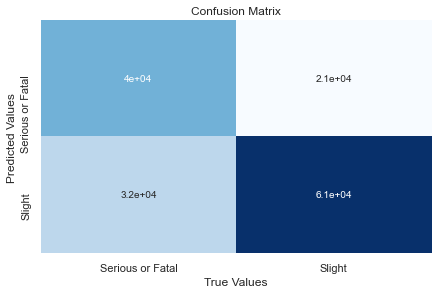

In [58]:
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# create dataframe
class_names = dataofcoll.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Serious or Fatal', 'Slight'], 
                         columns=['Serious or Fatal', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

## **4.2 Random Forest Classifier**

In [16]:

rf = RandomForestClassifier(n_estimators=100, n_jobs=3)

Full_Transformer.fit(X_train)
X_train_transformed = Full_Transformer.transform(X_train)
rf.fit(X_train_transformed, y_train)

X_test_transformed = Full_Transformer.transform(X_test)

y_pred = rf.predict(X_test_transformed)

print('Classification Report:' '\n',classification_report(y_test, y_pred))

print('Score:',roc_auc_score(y_test.values, rf.predict_proba(X_test_transformed)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72     61742
           1       0.80      0.87      0.83     92639

    accuracy                           0.79    154381
   macro avg       0.79      0.77      0.78    154381
weighted avg       0.79      0.79      0.79    154381

Score: 0.8540924830957961


In [32]:
X_train

1st_Road_Class Day_of_Week                      Junction_Detail  \
456708               B    Thursday              T or staggered junction   
370736               A    Saturday  Not at junction or within 20 metres   
243494               B     Tuesday  Not at junction or within 20 metres   
785303               A    Saturday                           Roundabout   
1359698   Unclassified   Wednesday                           Roundabout   
...                ...         ...                                  ...   
1782633              A   Wednesday              T or staggered junction   
1857601   Unclassified    Saturday                           Crossroads   
490713               A   Wednesday                           Crossroads   
124192               A    Thursday                           Roundabout   
1855856   Unclassified      Monday              T or staggered junction   

              Light_Conditions  Number_of_Casualties  Number_of_Vehicles  \
456708                Daylight                     1                   2   
370736                Daylight                     1                   3   
243494                Daylight                     1                   4   
785303                Daylight                     1                   2   
1359698  Darkness - lights lit                     1                   2   
...                        ...                   ...                 ...   
1782633               Daylight                     1                   2   
1857601               Daylight                     1                   2   
490713                Daylight                     1                   1   
124192                Daylight                     1                   1   
1855856  Darkness - lights lit                     1                   2   

        Road_Surface_Conditions           Road_Type  \
456708                      Dry  Single carriageway   
370736                      Dry  Single carriageway   
243494                      Dry  Single carriageway   
785303                      Dry          Roundabout   
1359698             Wet or damp          Roundabout   
...                         ...                 ...   
1782633                     Dry  Single carriageway   
1857601                     Dry      One way street   
490713                      Dry    Dual carriageway   
124192                      Dry          Roundabout   
1855856             Wet or damp  Single carriageway   

        Special_Conditions_at_Site  Speed_limit  ... Age_Band_of_Driver  \
456708                        None         20.0  ...            36 - 45   
370736                        None         60.0  ...            36 - 45   
243494                        None         30.0  ...            26 - 35   
785303                        None         60.0  ...            46 - 55   
1359698                       None         30.0  ...            36 - 45   
...                            ...          ...  ...                ...   
1782633                       None         30.0  ...            11 - 15   
1857601                       None         30.0  ...            36 - 45   
490713                        None         30.0  ...            36 - 45   
124192                        None         30.0  ...            26 - 35   
1855856                       None         40.0  ...            46 - 55   

        Age_of_Vehicle Hit_Object_in_Carriageway Hit_Object_off_Carriageway  \
456708             4.0                      None                       None   
370736            13.0                      None                       None   
243494             8.0                      None                       None   
785303             1.0                      None                       None   
1359698            6.0                      None                       None   
...                ...                       ...                        ...   
1782633            NaN                      None                       None   


In [55]:
len(X_train_transformed)

463141

In [56]:
feature_names = [f"feature {i}" for i in range(X_train_transformed.shape[1])]

In [57]:
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12',
 'feature 13',
 'feature 14',
 'feature 15',
 'feature 16',
 'feature 17',
 'feature 18',
 'feature 19',
 'feature 20',
 'feature 21',
 'feature 22',
 'feature 23',
 'feature 24',
 'feature 25',
 'feature 26',
 'feature 27',
 'feature 28',
 'feature 29',
 'feature 30',
 'feature 31',
 'feature 32',
 'feature 33',
 'feature 34',
 'feature 35',
 'feature 36',
 'feature 37',
 'feature 38',
 'feature 39',
 'feature 40',
 'feature 41',
 'feature 42',
 'feature 43',
 'feature 44',
 'feature 45',
 'feature 46',
 'feature 47',
 'feature 48',
 'feature 49',
 'feature 50',
 'feature 51',
 'feature 52',
 'feature 53',
 'feature 54',
 'feature 55',
 'feature 56',
 'feature 57',
 'feature 58',
 'feature 59',
 'feature 60',
 'feature 61',
 'feature 62',
 'feature 63',
 'feature 64',
 'feature 65',
 'feature 66',
 'fea

In [44]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [45]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)
forest_importances

feature 0      0.023685
feature 1      0.000850
feature 2      0.016691
feature 3      0.013066
feature 4      0.003740
                 ...   
feature 214    0.003173
feature 215    0.000064
feature 216    0.003639
feature 217    0.000013
feature 218    0.006902
Length: 219, dtype: float64

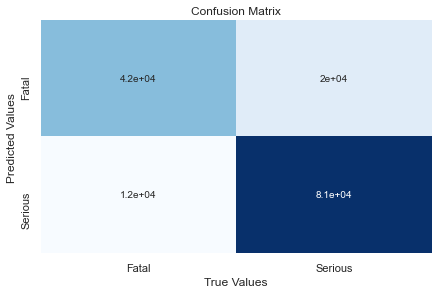

In [50]:
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# create dataframe
class_names = dataofcoll.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Serious or Fatal', 'Slight'], 
                         columns=['Serious or Fatal', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()